#séparation des données df_classification_binaire.csv (avec Nan)

In [ ]:
import pandas as pd
df = pd.read_csv('df_classification_binaire.csv')
df

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,INSTAL_AMT_INSTALMENT_MEAN,INSTAL_AMT_INSTALMENT_SUM,INSTAL_AMT_PAYMENT_MIN,INSTAL_AMT_PAYMENT_MAX,INSTAL_AMT_PAYMENT_MEAN,INSTAL_AMT_PAYMENT_SUM,INSTAL_DAYS_ENTRY_PAYMENT_MAX,INSTAL_DAYS_ENTRY_PAYMENT_MEAN,INSTAL_DAYS_ENTRY_PAYMENT_SUM,INSTAL_COUNT
0,100002,1.0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,...,11559.247105,219625.695,9251.775,53093.745,11559.247105,219625.695,-49.0,-315.421053,-5993.0,19.0
1,100003,0.0,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,...,64754.586000,1618864.650,6662.970,560835.360,64754.586000,1618864.650,-544.0,-1385.320000,-34633.0,25.0
2,100004,0.0,0,1,0,0,67500.0,135000.0,6750.0,135000.0,...,7096.155000,21288.465,5357.250,10573.965,7096.155000,21288.465,-727.0,-761.666667,-2285.0,3.0
3,100006,0.0,1,0,0,0,135000.0,312682.5,29686.5,297000.0,...,62947.088438,1007153.415,2482.920,691786.890,62947.088438,1007153.415,-12.0,-271.625000,-4346.0,16.0
4,100007,0.0,0,0,0,0,121500.0,513000.0,21865.5,513000.0,...,12666.444545,835985.340,0.180,22678.785,12214.060227,806127.975,-14.0,-1032.242424,-68128.0,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307502,456251,0.0,0,0,1,0,157500.0,254700.0,27558.0,225000.0,...,7492.924286,52450.470,6605.910,12815.010,7492.924286,52450.470,-38.0,-156.285714,-1094.0,7.0
307503,456252,0.0,1,0,0,0,72000.0,269550.0,12001.5,225000.0,...,10069.867500,60419.205,10046.880,10074.465,10069.867500,60419.205,-2327.0,-2393.833333,-14363.0,6.0
307504,456253,0.0,1,0,0,0,153000.0,677664.0,29979.0,585000.0,...,4399.707857,61595.910,27.270,5575.185,4115.915357,57622.815,-1738.0,-2387.428571,-33424.0,14.0
307505,456254,1.0,1,0,0,0,171000.0,370107.0,20205.0,319500.0,...,10239.832895,194556.825,2296.440,19065.825,10239.832895,194556.825,-18.0,-161.263158,-3064.0,19.0


In [ ]:
# Afficher le nombre de NaN par colonne
nan_counts = df.isna().sum()
print("Nombre de NaN par colonne :\n", nan_counts)

Nombre de NaN par colonne :
 SK_ID_CURR                            0
TARGET                                0
CODE_GENDER                           0
FLAG_OWN_CAR                          0
FLAG_OWN_REALTY                       0
                                  ...  
INSTAL_AMT_PAYMENT_SUM            15868
INSTAL_DAYS_ENTRY_PAYMENT_MAX     15876
INSTAL_DAYS_ENTRY_PAYMENT_MEAN    15876
INSTAL_DAYS_ENTRY_PAYMENT_SUM     15868
INSTAL_COUNT                      15868
Length: 626, dtype: int64


In [ ]:
#division initiale des données : 99% pour train (train_initial et final) et 1% pour X_nouveaux_clients (test)
#un sample sera pris des 90% pour la recherche des hyperparametres
#le model final sera entrainé sur toutes les données le 100% des 90%

from sklearn.model_selection import train_test_split

# Séparer 1% des données pour le test en utilisant la stratification
df_train, df_test = train_test_split(
    df,
    test_size=0.01,
    random_state=42,
    stratify=df['TARGET']
)

# Vérification des dimensions des jeux de données
print(f"Taille du jeu d'entraînement : {df_train.shape}")
print(f"Taille du jeu de test : {df_test.shape}")

Taille du jeu d'entraînement : (304431, 626)
Taille du jeu de test : (3076, 626)


In [ ]:
df_train.to_csv('df_train_n.csv', index=False)
df_test.to_csv('df_test_n.csv', index=False)

In [ ]:
#pour le df_test
# Séparer les features (X) et la cible (y)
X_api = df_test.drop(columns=['TARGET'])
y_api = df_test['TARGET']

from sklearn.model_selection import train_test_split
#pour df_train

# Séparation de 10% de df_train pour la recherche d'hyperparamètres
df_train_param, df_unused = train_test_split(df_train, test_size=0.9, stratify=df_train['TARGET'], random_state=42)

# Séparation des caractéristiques (X) et de la cible (y)
X_train_eval = df_train_param.drop(columns='TARGET')
y_train_eval = df_train_param['TARGET']
X_final = df_train.drop(columns='TARGET')
y_final = df_train['TARGET']

# Vérification des dimensions pour confirmation
print("Taille de X_train_eval:", X_train_eval.shape)
print("Taille de y_train_eval:", y_train_eval.shape)
print("Taille de X_api:", X_api.shape)
print("Taille de y_api:", y_api.shape)
print("Taille de X_final:", X_final.shape)
print("Taille de y_final:", y_final.shape)

# X_train_eval et y_train_eval : Utilisés pour l'entraînement et la validation des modèles
# X_api et y_api : Échantillon pour tester l'API
# X_final et y_final : Jeu de données final pour évaluation

Taille de X_train_eval: (30443, 625)
Taille de y_train_eval: (30443,)
Taille de X_api: (3076, 625)
Taille de y_api: (3076,)
Taille de X_final: (304431, 625)
Taille de y_final: (304431,)


In [ ]:
# Réinitialiser les index pour s'assurer qu'ils sont consécutifs
X_train_eval = X_train_eval.reset_index(drop=True)
y_train_eval = y_train_eval.reset_index(drop=True)
X_final = X_final.reset_index(drop=True)
y_final = y_final.reset_index(drop=True)
X_api = X_api.reset_index(drop=True)
y_api = y_api.reset_index(drop=True)

In [ ]:
X_train_eval = X_train_eval.to_csv('X_train_eval_n.csv', index=False)
y_train_eval = y_train_eval.to_csv('y_train_eval_n.csv', index=False)
X_final = X_final.to_csv('X_final_n.csv', index=False)
y_final = y_final.to_csv('y_final_n.csv', index=False)
X_api = X_api.to_csv('X_api_n.csv', index=False)
y_api = y_api.to_csv('y_api_n.csv', index=False)

In [ ]:
#séparation des données df_clean_imputed.csv (sans Nan)
#import pandas as pd
#df = pd.read_csv('df_clean_imputed.csv')
#df


#Light GBM mlruns 522829606599791631

In [ ]:
import time
import logging
import gc
import mlflow
import optuna
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from sklearn.utils.class_weight import compute_sample_weight

# Initialisation
cv = StratifiedKFold(n_splits=5)
results_lgbm = []
nb_runs = 15
logging.getLogger('optuna').setLevel(logging.CRITICAL)

# Chronomètre d'entraînement
start_time = time.time()

# Définir l'expérience MLflow
mlflow.set_experiment('LightGBM Classifier')

# Chargement des fichiers
X_train_eval = pd.read_csv('X_train_eval_n.csv')
y_train_eval = pd.read_csv('y_train_eval_n.csv')
X_final = pd.read_csv('X_final_n.csv')
y_final = pd.read_csv('y_final_n.csv')
X_api = pd.read_csv('X_api_n.csv')
y_api = pd.read_csv('y_api_n.csv')

# Suppression de la colonne SK_ID_CURR
X_train_eval = X_train_eval.drop(columns=['SK_ID_CURR'])
X_final = X_final.drop(columns=['SK_ID_CURR'])
X_api = X_api.drop(columns=['SK_ID_CURR'])

# Conversion en float32 pour économiser la mémoire
X_train_eval= X_train_eval.astype(np.float32)
X_final = X_final.astype(np.float32)
X_api = X_api.astype(np.float32)
X_api.to_csv('df_nouveaux_clients.csv', index=False)

# Fonction de LightGBM pour l'optimisation Optuna
def lightgbm(trial):
    # Définir les hyperparamètres avec Optuna
    num_leaves = trial.suggest_int('num_leaves', 30, 50)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    learning_rate = trial.suggest_float('learning_rate', 0.001, 0.1, log=True)
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, log=True)
    subsample = trial.suggest_float('subsample', 0.6, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.6, 1.0)

    # Calcul des poids des classes pour gérer le déséquilibre
    class_weights = compute_sample_weight(class_weight='balanced', y=y_train_eval.values.flatten())

    # Modèle de LightGBM avec gestion du déséquilibre via class_weight
    model = lgb.LGBMClassifier(num_leaves=num_leaves, max_depth=max_depth,
                               learning_rate=learning_rate, n_estimators=n_estimators,
                               subsample=subsample, colsample_bytree=colsample_bytree,
                               n_jobs=-1, random_state=42)

    auc_scores, acc_scores, cost_scores = [], [], []

    # Validation croisée
    for train_idx, test_idx in cv.split(X_train_eval, y_train_eval):
        X_train, X_test = X_train_eval.iloc[train_idx], X_train_eval.iloc[test_idx]
        y_train, y_test = y_train_eval.iloc[train_idx], y_train_eval.iloc[test_idx]

        # Entraînement avec les poids de classe
        model.fit(X_train, y_train, sample_weight=class_weights[train_idx])

        # Prédictions et probabilités
        y_prob = model.predict_proba(X_test)[:, 1]
        y_pred = y_prob > 0.5

        # Calcul des métriques
        auc_scores.append(roc_auc_score(y_test, y_prob))
        acc_scores.append(accuracy_score(y_test, y_pred))
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        cost_scores.append(fp + 10 * fn)

    # Calcul des moyennes pour chaque métrique
    auc = np.mean(auc_scores)
    acc = np.mean(acc_scores)
    cost = np.mean(cost_scores)

    # Sauvegarde des résultats
    results_lgbm.append({"AUC": auc, "Accuracy": acc, "Score_métier": cost,
                         "num_leaves": num_leaves, "max_depth": max_depth,
                         "learning_rate": learning_rate, "n_estimators": n_estimators,
                         "subsample": subsample, "colsample_bytree": colsample_bytree})

    # Enregistrement dans MLflow
    with mlflow.start_run():
        mlflow.log_params(trial.params)
        mlflow.log_metrics({"AUC": auc, "Accuracy": acc, "Score_métier": cost})

        # Courbe ROC
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.figure(figsize=(10, 7))
        plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
        plt.title('ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.savefig("roc_curve_lgbm.png")
        plt.close()
        mlflow.log_artifact("roc_curve_lgbm.png")

        mlflow.lightgbm.log_model(model, "lightgbm_model", input_example=X_train_eval[:5])

    gc.collect()
    return cost

# Optimisation avec Optuna
study_lgbm = optuna.create_study(direction='minimize')
study_lgbm.optimize(lightgbm, n_trials=nb_runs)

# Fin du temps d'entraînement
end_time = time.time()
print(f"Temps d'entraînement total: {end_time - start_time:.2f} secondes")

# Meilleurs résultats et paramètres
best_params_lgbm = study_lgbm.best_params
best_auc_lgbm = max([res['AUC'] for res in results_lgbm])
best_acc_lgbm = max([res['Accuracy'] for res in results_lgbm])
best_cost_lgbm = min([res['Score_métier'] for res in results_lgbm])

# Affichage des meilleurs paramètres
print(study_lgbm.best_params)
with mlflow.start_run():
    mlflow.log_params(best_params_lgbm)
joblib.dump(best_params_lgbm, 'best_params_lgbm.pkl')

c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024/11/11 08:16:37 INFO mlflow.tracking.fluent: Experiment with name 'LightGBM Classifier' does not exist. Creating a new experiment.
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=Tr

[LightGBM] [Info] Number of positive: 1966, number of negative: 22388
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.083770 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 65346
[LightGBM] [Info] Number of data points in the train set: 24354, number of used features: 600
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499949 -> initscore=-0.000203
[LightGBM] [Info] Start training from score -0.000203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1966, number of negative: 22388
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.282913 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 65255
[LightGBM] [Info] Number of data points in the train set: 24354, number of used features: 600
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499949 -> initscore=-0.000203
[LightGBM] [Info] Start training from score -0.000203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1966, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.399788 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65361
[LightGBM] [Info] Number of data points in the train set: 24354, number of used features: 599
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499949 -> initscore=-0.000203
[LightGBM] [Info] Start training from score -0.000203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1967, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.165001 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65312
[LightGBM] [Info] Number of data points in the train set: 24355, number of used features: 600
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500076 -> initscore=0.000305
[LightGBM] [Info] Start training from score 0.000305
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1967, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.125991 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65222
[LightGBM] [Info] Number of data points in the train set: 24355, number of used features: 599
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500076 -> initscore=0.000305
[LightGBM] [Info] Start training from score 0.000305
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1966, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.170177 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65346
[LightGBM] [Info] Number of data points in the train set: 24354, number of used features: 600
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499949 -> initscore=-0.000203
[LightGBM] [Info] Start training from score -0.000203


c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1966, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.212420 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65255
[LightGBM] [Info] Number of data points in the train set: 24354, number of used features: 600
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499949 -> initscore=-0.000203
[LightGBM] [Info] Start training from score -0.000203


c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1966, number of negative: 22388
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.113110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 65361
[LightGBM] [Info] Number of data points in the train set: 24354, number of used features: 599
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499949 -> initscore=-0.000203
[LightGBM] [Info] Start training from score -0.000203


c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1967, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.362214 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65312
[LightGBM] [Info] Number of data points in the train set: 24355, number of used features: 600
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500076 -> initscore=0.000305
[LightGBM] [Info] Start training from score 0.000305


c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1967, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.518853 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65222
[LightGBM] [Info] Number of data points in the train set: 24355, number of used features: 599
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500076 -> initscore=0.000305
[LightGBM] [Info] Start training from score 0.000305


c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1966, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.295961 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65346
[LightGBM] [Info] Number of data points in the train set: 24354, number of used features: 600
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499949 -> initscore=-0.000203
[LightGBM] [Info] Start training from score -0.000203


c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1966, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.265726 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65255
[LightGBM] [Info] Number of data points in the train set: 24354, number of used features: 600
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499949 -> initscore=-0.000203
[LightGBM] [Info] Start training from score -0.000203


c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1966, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.403257 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65361
[LightGBM] [Info] Number of data points in the train set: 24354, number of used features: 599
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499949 -> initscore=-0.000203
[LightGBM] [Info] Start training from score -0.000203


c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1967, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.137348 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65312
[LightGBM] [Info] Number of data points in the train set: 24355, number of used features: 600
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500076 -> initscore=0.000305
[LightGBM] [Info] Start training from score 0.000305


c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1967, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.135644 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65222
[LightGBM] [Info] Number of data points in the train set: 24355, number of used features: 599
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500076 -> initscore=0.000305
[LightGBM] [Info] Start training from score 0.000305


c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1966, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.248854 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65346
[LightGBM] [Info] Number of data points in the train set: 24354, number of used features: 600
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499949 -> initscore=-0.000203
[LightGBM] [Info] Start training from score -0.000203


c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1966, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.233463 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65255
[LightGBM] [Info] Number of data points in the train set: 24354, number of used features: 600
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499949 -> initscore=-0.000203
[LightGBM] [Info] Start training from score -0.000203


c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1966, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.150686 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65361
[LightGBM] [Info] Number of data points in the train set: 24354, number of used features: 599
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499949 -> initscore=-0.000203
[LightGBM] [Info] Start training from score -0.000203


c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1967, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.156811 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65312
[LightGBM] [Info] Number of data points in the train set: 24355, number of used features: 600
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500076 -> initscore=0.000305
[LightGBM] [Info] Start training from score 0.000305


c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1967, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.162897 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65222
[LightGBM] [Info] Number of data points in the train set: 24355, number of used features: 599
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500076 -> initscore=0.000305
[LightGBM] [Info] Start training from score 0.000305


c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1966, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.858435 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65346
[LightGBM] [Info] Number of data points in the train set: 24354, number of used features: 600
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499949 -> initscore=-0.000203
[LightGBM] [Info] Start training from score -0.000203


c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1966, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.136903 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65255
[LightGBM] [Info] Number of data points in the train set: 24354, number of used features: 600
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499949 -> initscore=-0.000203
[LightGBM] [Info] Start training from score -0.000203


c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1966, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.549992 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65361
[LightGBM] [Info] Number of data points in the train set: 24354, number of used features: 599
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499949 -> initscore=-0.000203
[LightGBM] [Info] Start training from score -0.000203


c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1967, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.172620 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65312
[LightGBM] [Info] Number of data points in the train set: 24355, number of used features: 600
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500076 -> initscore=0.000305
[LightGBM] [Info] Start training from score 0.000305


c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1967, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.296114 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65222
[LightGBM] [Info] Number of data points in the train set: 24355, number of used features: 599
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500076 -> initscore=0.000305
[LightGBM] [Info] Start training from score 0.000305


c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1966, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.459901 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65346
[LightGBM] [Info] Number of data points in the train set: 24354, number of used features: 600
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499949 -> initscore=-0.000203
[LightGBM] [Info] Start training from score -0.000203


c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1966, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.136527 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65255
[LightGBM] [Info] Number of data points in the train set: 24354, number of used features: 600
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499949 -> initscore=-0.000203
[LightGBM] [Info] Start training from score -0.000203


c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1966, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.133178 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65361
[LightGBM] [Info] Number of data points in the train set: 24354, number of used features: 599
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499949 -> initscore=-0.000203
[LightGBM] [Info] Start training from score -0.000203


c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1967, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.223040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65312
[LightGBM] [Info] Number of data points in the train set: 24355, number of used features: 600
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500076 -> initscore=0.000305
[LightGBM] [Info] Start training from score 0.000305


c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1967, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.147353 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65222
[LightGBM] [Info] Number of data points in the train set: 24355, number of used features: 599
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500076 -> initscore=0.000305
[LightGBM] [Info] Start training from score 0.000305


c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1966, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.545938 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65346
[LightGBM] [Info] Number of data points in the train set: 24354, number of used features: 600
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499949 -> initscore=-0.000203
[LightGBM] [Info] Start training from score -0.000203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1966, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.144144 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65255
[LightGBM] [Info] Number of data points in the train set: 24354, number of used features: 600
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499949 -> initscore=-0.000203
[LightGBM] [Info] Start training from score -0.000203


c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1966, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.121021 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65361
[LightGBM] [Info] Number of data points in the train set: 24354, number of used features: 599
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499949 -> initscore=-0.000203
[LightGBM] [Info] Start training from score -0.000203


c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1967, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.178193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65312
[LightGBM] [Info] Number of data points in the train set: 24355, number of used features: 600
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500076 -> initscore=0.000305
[LightGBM] [Info] Start training from score 0.000305


c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1967, number of negative: 22388
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.239991 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 65222
[LightGBM] [Info] Number of data points in the train set: 24355, number of used features: 599
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500076 -> initscore=0.000305
[LightGBM] [Info] Start training from score 0.000305
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1966, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.333435 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65346
[LightGBM] [Info] Number of data points in the train set: 24354, number of used features: 600
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499949 -> initscore=-0.000203
[LightGBM] [Info] Start training from score -0.000203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1966, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.154711 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65255
[LightGBM] [Info] Number of data points in the train set: 24354, number of used features: 600
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499949 -> initscore=-0.000203
[LightGBM] [Info] Start training from score -0.000203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1966, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.132832 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65361
[LightGBM] [Info] Number of data points in the train set: 24354, number of used features: 599
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499949 -> initscore=-0.000203
[LightGBM] [Info] Start training from score -0.000203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1967, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.172040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65312
[LightGBM] [Info] Number of data points in the train set: 24355, number of used features: 600
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500076 -> initscore=0.000305
[LightGBM] [Info] Start training from score 0.000305
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1967, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.158431 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65222
[LightGBM] [Info] Number of data points in the train set: 24355, number of used features: 599
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500076 -> initscore=0.000305
[LightGBM] [Info] Start training from score 0.000305
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1966, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.133249 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65346
[LightGBM] [Info] Number of data points in the train set: 24354, number of used features: 600
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499949 -> initscore=-0.000203
[LightGBM] [Info] Start training from score -0.000203


c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1966, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.135279 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65255
[LightGBM] [Info] Number of data points in the train set: 24354, number of used features: 600
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499949 -> initscore=-0.000203
[LightGBM] [Info] Start training from score -0.000203


c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1966, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.136287 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65361
[LightGBM] [Info] Number of data points in the train set: 24354, number of used features: 599
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499949 -> initscore=-0.000203
[LightGBM] [Info] Start training from score -0.000203


c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1967, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.136160 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65312
[LightGBM] [Info] Number of data points in the train set: 24355, number of used features: 600
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500076 -> initscore=0.000305
[LightGBM] [Info] Start training from score 0.000305


c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1967, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.137090 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65222
[LightGBM] [Info] Number of data points in the train set: 24355, number of used features: 599
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500076 -> initscore=0.000305
[LightGBM] [Info] Start training from score 0.000305


c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1966, number of negative: 22388
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.396909 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 65346
[LightGBM] [Info] Number of data points in the train set: 24354, number of used features: 600
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499949 -> initscore=-0.000203
[LightGBM] [Info] Start training from score -0.000203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1966, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.139250 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65255
[LightGBM] [Info] Number of data points in the train set: 24354, number of used features: 600
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499949 -> initscore=-0.000203
[LightGBM] [Info] Start training from score -0.000203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1966, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.137880 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65361
[LightGBM] [Info] Number of data points in the train set: 24354, number of used features: 599
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499949 -> initscore=-0.000203
[LightGBM] [Info] Start training from score -0.000203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1967, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.139151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65312
[LightGBM] [Info] Number of data points in the train set: 24355, number of used features: 600
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500076 -> initscore=0.000305
[LightGBM] [Info] Start training from score 0.000305
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1967, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.135276 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65222
[LightGBM] [Info] Number of data points in the train set: 24355, number of used features: 599
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500076 -> initscore=0.000305
[LightGBM] [Info] Start training from score 0.000305
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1966, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.250773 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65346
[LightGBM] [Info] Number of data points in the train set: 24354, number of used features: 600
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499949 -> initscore=-0.000203
[LightGBM] [Info] Start training from score -0.000203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1966, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.137708 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65255
[LightGBM] [Info] Number of data points in the train set: 24354, number of used features: 600
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499949 -> initscore=-0.000203
[LightGBM] [Info] Start training from score -0.000203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1966, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.139749 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65361
[LightGBM] [Info] Number of data points in the train set: 24354, number of used features: 599
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499949 -> initscore=-0.000203
[LightGBM] [Info] Start training from score -0.000203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1967, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.133354 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65312
[LightGBM] [Info] Number of data points in the train set: 24355, number of used features: 600
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500076 -> initscore=0.000305
[LightGBM] [Info] Start training from score 0.000305
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1967, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.147813 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65222
[LightGBM] [Info] Number of data points in the train set: 24355, number of used features: 599
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500076 -> initscore=0.000305
[LightGBM] [Info] Start training from score 0.000305
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1966, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.155624 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65346
[LightGBM] [Info] Number of data points in the train set: 24354, number of used features: 600
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499949 -> initscore=-0.000203
[LightGBM] [Info] Start training from score -0.000203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1966, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.130486 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65255
[LightGBM] [Info] Number of data points in the train set: 24354, number of used features: 600
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499949 -> initscore=-0.000203
[LightGBM] [Info] Start training from score -0.000203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1966, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.131742 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65361
[LightGBM] [Info] Number of data points in the train set: 24354, number of used features: 599
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499949 -> initscore=-0.000203
[LightGBM] [Info] Start training from score -0.000203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1967, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.140330 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65312
[LightGBM] [Info] Number of data points in the train set: 24355, number of used features: 600
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500076 -> initscore=0.000305
[LightGBM] [Info] Start training from score 0.000305
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1967, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.142669 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65222
[LightGBM] [Info] Number of data points in the train set: 24355, number of used features: 599
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500076 -> initscore=0.000305
[LightGBM] [Info] Start training from score 0.000305
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1966, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.406988 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65346
[LightGBM] [Info] Number of data points in the train set: 24354, number of used features: 600
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499949 -> initscore=-0.000203
[LightGBM] [Info] Start training from score -0.000203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1966, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.136802 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65255
[LightGBM] [Info] Number of data points in the train set: 24354, number of used features: 600
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499949 -> initscore=-0.000203
[LightGBM] [Info] Start training from score -0.000203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1966, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.175346 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65361
[LightGBM] [Info] Number of data points in the train set: 24354, number of used features: 599
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499949 -> initscore=-0.000203
[LightGBM] [Info] Start training from score -0.000203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1967, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.136065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65312
[LightGBM] [Info] Number of data points in the train set: 24355, number of used features: 600
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500076 -> initscore=0.000305
[LightGBM] [Info] Start training from score 0.000305
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1967, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.129162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65222
[LightGBM] [Info] Number of data points in the train set: 24355, number of used features: 599
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500076 -> initscore=0.000305
[LightGBM] [Info] Start training from score 0.000305
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1966, number of negative: 22388
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.455116 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 65346
[LightGBM] [Info] Number of data points in the train set: 24354, number of used features: 600
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499949 -> initscore=-0.000203
[LightGBM] [Info] Start training from score -0.000203


c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1966, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.126116 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65255
[LightGBM] [Info] Number of data points in the train set: 24354, number of used features: 600
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499949 -> initscore=-0.000203
[LightGBM] [Info] Start training from score -0.000203


c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1966, number of negative: 22388
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.516424 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 65361
[LightGBM] [Info] Number of data points in the train set: 24354, number of used features: 599
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499949 -> initscore=-0.000203
[LightGBM] [Info] Start training from score -0.000203


c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1967, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.140374 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65312
[LightGBM] [Info] Number of data points in the train set: 24355, number of used features: 600
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500076 -> initscore=0.000305
[LightGBM] [Info] Start training from score 0.000305


c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1967, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.142228 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65222
[LightGBM] [Info] Number of data points in the train set: 24355, number of used features: 599
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500076 -> initscore=0.000305
[LightGBM] [Info] Start training from score 0.000305


c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1966, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.223443 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65346
[LightGBM] [Info] Number of data points in the train set: 24354, number of used features: 600
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499949 -> initscore=-0.000203
[LightGBM] [Info] Start training from score -0.000203


c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1966, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.137820 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65255
[LightGBM] [Info] Number of data points in the train set: 24354, number of used features: 600
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499949 -> initscore=-0.000203
[LightGBM] [Info] Start training from score -0.000203


c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1966, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.140526 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65361
[LightGBM] [Info] Number of data points in the train set: 24354, number of used features: 599
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499949 -> initscore=-0.000203
[LightGBM] [Info] Start training from score -0.000203


c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1967, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.131131 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65312
[LightGBM] [Info] Number of data points in the train set: 24355, number of used features: 600
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500076 -> initscore=0.000305
[LightGBM] [Info] Start training from score 0.000305


c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1967, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.133174 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65222
[LightGBM] [Info] Number of data points in the train set: 24355, number of used features: 599
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500076 -> initscore=0.000305
[LightGBM] [Info] Start training from score 0.000305


Temps d'entraînement total: 2606.14 secondes
{'num_leaves': 47, 'max_depth': 4, 'learning_rate': 0.027735332763298617, 'n_estimators': 299, 'subsample': 0.6712682308079673, 'colsample_bytree': 0.604771569275118}


['best_params_lgbm.pkl']

In [ ]:
######################################################################################################################################################
#2
# Entraînement final sur toutes les données avec les meilleurs paramètres

start_time = time.time()

# Initialisation du modèle LightGBM avec les meilleurs paramètres obtenus
final_model_lgbm = lgb.LGBMClassifier(**best_params_lgbm, n_jobs=-1, random_state=42)

# Calcul des poids des classes pour gérer le déséquilibre sur les données complètes
class_weights_final = compute_sample_weight(class_weight='balanced', y=y_final.values.flatten())

# Entraînement du modèle final avec les poids de classes
final_model_lgbm.fit(X_final, y_final, sample_weight=class_weights_final)

# Affichage du temps d'entraînement final
end_time = time.time()
print(f"Temps d'entraînement final: {end_time - start_time:.2f} secondes")

# Enregistrement du modèle final
joblib.dump(final_model_lgbm, 'lightgbm_model_f.joblib')

# Sauvegarde des résultats dans un DataFrame
results_df_lgbm = pd.DataFrame(results_lgbm)

# Tri des résultats par Score métier croissant (du plus petit au plus grand)
results_df_sorted_lgbm = results_df_lgbm.sort_values(by='Score_métier', ascending=True)

# Enregistrement des résultats dans un fichier CSV
results_df_sorted_lgbm.to_csv('results_lightgbm.csv', index=False)

print("Les résultats ont été exportés dans 'results_lightgbm.csv'")


c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 24577, number of negative: 279854
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 2.816162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 74212
[LightGBM] [Info] Number of data points in the train set: 304431, number of used features: 616
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

In [ ]:
######################################################################################################################################################
#3
#prédiction final et métriques

# Recharger uniquement la colonne 'SK_ID_CURR' à partir du fichier d'origine
X_final_pour_id = pd.read_csv('X_final_n.csv', usecols=['SK_ID_CURR'])

# Vérifiez que la taille correspond
assert len(X_final_pour_id) == len(X_final), "La taille des données ne correspond pas. Vérifiez les étapes de prétraitement."


# Aplatir y_final pour le rendre compatible avec les autres colonnes 1D
y_final = y_final.values.flatten()
#y_final = y_final.flatten()

# Prédictions finales et métriques
y_prob_final_lgbm = final_model_lgbm.predict_proba(X_final)[:, 1]
y_pred_final_lgbm = y_prob_final_lgbm > 0.5

# Calcul des métriques finales en utilisant y_final
final_auc = roc_auc_score(y_final, y_prob_final_lgbm)
final_accuracy = accuracy_score(y_final, y_pred_final_lgbm)
tn, fp, fn, tp = confusion_matrix(y_final, y_pred_final_lgbm).ravel()
final_cost = fp + 10 * fn

# Création du DataFrame avec les métriques pour chaque client
results_df_lgbm_f = pd.DataFrame({
    "SK_ID_CURR": X_final_pour_id['SK_ID_CURR'].values,
    "Probabilité": y_prob_final_lgbm,
    "Prédiction": y_pred_final_lgbm,
    "Vrai_Label": y_final
})

# Ajout des métriques globales en tant que nouvelles colonnes
results_df_lgbm_f["AUC"] = final_auc
results_df_lgbm_f["Accuracy"] = final_accuracy
results_df_lgbm_f["Score_métier"] = final_cost

print("Métriques du modèle lightgbm final avec les meilleurs paramètres:")
print(f"AUC: {final_auc:.4f}")
print(f"Accuracy: {final_accuracy:.4f}")
print(f"Score_métier: {final_cost:.4f}")

# Affichage du DataFrame final
results_df_lgbm_f.head(15)

Métriques du modèle lightgbm final avec les meilleurs paramètres:
AUC: 0.7927
Accuracy: 0.7173
Score_métier: 147182.0000


,SK_ID_CURR,Probabilité,Prédiction,Vrai_Label,AUC,Accuracy,Score_métier
0,202883,0.600812,True,0.0,0.792705,0.717328,147182
1,353282,0.659941,True,0.0,0.792705,0.717328,147182
2,280134,0.451956,False,0.0,0.792705,0.717328,147182
3,111527,0.380457,False,0.0,0.792705,0.717328,147182
4,362418,0.701661,True,0.0,0.792705,0.717328,147182
5,106400,0.401682,False,0.0,0.792705,0.717328,147182
6,103241,0.577684,True,0.0,0.792705,0.717328,147182
7,228257,0.851938,True,1.0,0.792705,0.717328,147182
8,179577,0.231338,False,0.0,0.792705,0.717328,147182
9,245931,0.119551,False,0.0,0.792705,0.717328,147182


In [ ]:
'''######################################################################################################################################################
#4
# Prédictions finales et métriques sur les données de test API avec le seuil optimisé

y_prob_final_lgbm = final_model_lgbm.predict_proba(X_api)[:, 1]
y_pred_final_lgbm = y_prob_final_lgbm > 0.5

# Calcul des métriques finales
api_auc = roc_auc_score(y_api, y_prob_final_lgbm)
api_accuracy = accuracy_score(y_api, y_pred_final_lgbm)
tn, fp, fn, tp = confusion_matrix(y_api, y_pred_final_lgbm).ravel()
api_cost = fp + 10 * fn

print("Métriques du modèle lightgbm final avec les meilleurs paramètres sur les données test API:")
print(f"AUC: {api_auc:.4f}")
print(f"Accuracy: {api_accuracy:.4f}")
print(f"Score_métier: {api_cost:.4f}")

# Enregistrement des métriques finales dans MLflow
with mlflow.start_run():
    mlflow.log_metrics({"Final AUC_t lightgbm": api_auc,
                        "Final Accuracy_t lightgbm": api_accuracy,
                        "Final Score_métier_t lightgbm": api_cost})'''

In [ ]:
#5 à la recherche du meilleur seuil (en utilisant les données x_train_eval)

import numpy as np
from sklearn.metrics import confusion_matrix

# Calcul des probabilités pour les données de test (API)
y_prob_final_lgbm = final_model_lgbm.predict_proba(X_train_eval)[:, 1]

# Initialisation des variables pour stocker les coûts pour chaque seuil
costs = []
thresholds = np.linspace(0, 1, 101)  # Tester les seuils entre 0 et 1 avec un pas de 0.01

# Calcul du coût pour chaque seuil
for threshold in thresholds:
    # Prédictions binaires avec le seuil actuel
    y_pred = (y_prob_final_lgbm >= threshold).astype(int)

    # Matrice de confusion
    tn, fp, fn, tp = confusion_matrix(y_train_eval, y_pred).ravel()

    # Calcul du coût
    cost = fp + 10 * fn
    costs.append(cost)

# Trouver le seuil qui minimise le coût
optimal_threshold = thresholds[np.argmin(costs)]
optimal_cost = min(costs)

# Prédictions finales avec le seuil optimisé
y_pred_optimized = (y_prob_final_lgbm >= optimal_threshold).astype(int)

# Calcul des métriques avec le seuil optimisé
optimized_auc = roc_auc_score(y_train_eval, y_prob_final_lgbm)
optimized_accuracy = accuracy_score(y_train_eval, y_pred_optimized)
tn, fp, fn, tp = confusion_matrix(y_train_eval, y_pred_optimized).ravel()
optimized_cost = fp + 10 * fn

# Affichage des résultats
print("Métriques après optimisation du seuil pour minimiser le coût :")
print(f"Seuil optimal : {optimal_threshold:.2f}")
print(f"Coût optimisé : {optimized_cost:.4f}")
print(f"AUC optimisée : {optimized_auc:.4f}")
print(f"Accuracy optimisée : {optimized_accuracy:.4f}")

# Enregistrement des métriques optimisées dans MLflow
with mlflow.start_run():
    mlflow.log_metrics({"Optimized AUC": optimized_auc,
                        "Optimized Accuracy": optimized_accuracy,
                        "Optimized Cost": optimized_cost})

Métriques après optimisation du seuil pour minimiser le coût :
Seuil optimal : 0.53
Coût optimisé : 14632.0000
AUC optimisée : 0.7938
Accuracy optimisée : 0.7535


In [ ]:
######################################################################################################################################################
#6 avec le seuil optimiser  = 0.53 (je recommence (l'étape3) les prédiction sur toutes les données)

# Aplatir y_final pour le rendre compatible avec les autres colonnes 1D
#y_final = y_final.values.flatten()
y_final = y_final.flatten()

# Prédictions finales et métriques
y_prob_final_lgbm = final_model_lgbm.predict_proba(X_final)[:, 1]
y_pred_final_lgbm = y_prob_final_lgbm > 0.53

# Calcul des métriques finales en utilisant y_final
final_auc = roc_auc_score(y_final, y_prob_final_lgbm)
final_accuracy = accuracy_score(y_final, y_pred_final_lgbm)
tn, fp, fn, tp = confusion_matrix(y_final, y_pred_final_lgbm).ravel()
final_cost = fp + 10 * fn

# Création du DataFrame avec les métriques pour chaque client
results_df_lgbm_f = pd.DataFrame({
    "SK_ID_CURR": X_final_pour_id['SK_ID_CURR'].values,
    "Probabilité": y_prob_final_lgbm,
    "Prédiction": y_pred_final_lgbm,
    "Vrai_Label": y_final
})

# Ajout des métriques globales en tant que nouvelles colonnes
results_df_lgbm_f["AUC"] = final_auc
results_df_lgbm_f["Accuracy"] = final_accuracy
results_df_lgbm_f["Business Score"] = final_cost

print("Métriques du modèle lightgbm final avec les meilleurs paramètres:")
print(f"AUC: {final_auc:.4f}")
print(f"Accuracy: {final_accuracy:.4f}")
print(f"Business Score: {final_cost:.4f}")

# Affichage du DataFrame final
results_df_lgbm_f.head(15)

Métriques du modèle lightgbm final avec les meilleurs paramètres:
AUC: 0.7927
Accuracy: 0.7524
Business Score: 146897.0000


,SK_ID_CURR,Probabilité,Prédiction,Vrai_Label,AUC,Accuracy,Business Score
0,202883,0.600812,True,0.0,0.792705,0.75241,146897
1,353282,0.659941,True,0.0,0.792705,0.75241,146897
2,280134,0.451956,False,0.0,0.792705,0.75241,146897
3,111527,0.380457,False,0.0,0.792705,0.75241,146897
4,362418,0.701661,True,0.0,0.792705,0.75241,146897
5,106400,0.401682,False,0.0,0.792705,0.75241,146897
6,103241,0.577684,True,0.0,0.792705,0.75241,146897
7,228257,0.851938,True,1.0,0.792705,0.75241,146897
8,179577,0.231338,False,0.0,0.792705,0.75241,146897
9,245931,0.119551,False,0.0,0.792705,0.75241,146897


In [ ]:
######################################################################################################################################################
#7 (4)
# Prédictions finales et métriques sur les données de test API avec le seuil optimisé

y_prob_final_lgbm = final_model_lgbm.predict_proba(X_api)[:, 1]
y_pred_final_lgbm = y_prob_final_lgbm > 0.53

# Calcul des métriques finales
api_auc = roc_auc_score(y_api, y_prob_final_lgbm)
api_accuracy = accuracy_score(y_api, y_pred_final_lgbm)
tn, fp, fn, tp = confusion_matrix(y_api, y_pred_final_lgbm).ravel()
api_cost = fp + 10 * fn

print("Métriques du modèle lightgbm final avec les meilleurs paramètres sur les données test API:")
print(f"AUC: {api_auc:.4f}")
print(f"Accuracy: {api_accuracy:.4f}")
print(f"Score_métier: {api_cost:.4f}")

# Enregistrement des métriques finales dans MLflow
with mlflow.start_run():
    mlflow.log_metrics({"Final AUC_t lightgbm": api_auc,
                        "Final Accuracy_t lightgbm": api_accuracy,
                        "Final Score_métier_t lightgbm": api_cost})

Métriques du modèle lightgbm final avec les meilleurs paramètres sur les données test API:
AUC: 0.7918
Accuracy: 0.7611
Score_métier: 1446.0000


#Random Forest mlruns : 399831097810513759 avec pipeline

In [ ]:
#avec le pipeline qui gère l'imputation et le déséquilibre des classes de
#dans l'entraînement et l'optimisation avec Optuna

#Random Forest gère les classes déséquilibrées en utilisant l'argument class_weight='balanced'

import time
import logging
import gc
import mlflow
import optuna
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer

# Initialisation
cv = StratifiedKFold(n_splits=5)
results_rf = []
nb_runs = 15
logging.getLogger('optuna').setLevel(logging.CRITICAL)

# Chronomètre d'entraînement
start_time = time.time()

# Définir l'expérience MLflow
mlflow.set_experiment('Random Forest Classifier')

# Chargement des fichiers
#X_train_eval = pd.read_csv('X_train_eval_n.csv')
#y_train_eval = pd.read_csv('y_train_eval_n.csv')
#X_final = pd.read_csv('X_final_n.csv')
#y_final = pd.read_csv('y_final_n.csv')
#X_api = pd.read_csv('X_api_n.csv')
#y_api = pd.read_csv('y_api_n.csv')

# Suppression de la colonne SK_ID_CURR
#X_train_eval = X_train_eval.drop(columns=['SK_ID_CURR'])
#X_final = X_final.drop(columns=['SK_ID_CURR'])
#X_api = X_api.drop(columns=['SK_ID_CURR'])

# Conversion en float32 pour économiser la mémoire
#X_train_eval= X_train_eval.astype(np.float32)
#X_final = X_final.astype(np.float32)
#X_api = X_api.astype(np.float32)
#X_api.to_csv('df_nouveaux_clients.csv', index=False)

# Chronomètre d'entraînement
start_time = time.time()

# Fonction de Random Forest pour l'optimisation Optuna
def random_forest(trial):
    # Définir les hyperparamètres avec Optuna
    n_estimators = trial.suggest_categorical('n_estimators', [50, 100])
    max_depth = trial.suggest_categorical('max_depth', [10, 15])
    min_samples_split = trial.suggest_categorical('min_samples_split', [15, 20])
    min_samples_leaf = trial.suggest_categorical('min_samples_leaf', [15, 20])
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])

    # Création du modèle avec le pipeline (imputation puis random forest)
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),  # Imputation par la moyenne
        ('model', RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            max_features=max_features,
            bootstrap=False,
            n_jobs=-1,
            class_weight='balanced',  # Gestion du déséquilibre des classes
            random_state=42
        ))
    ])

    auc_scores, acc_scores, cost_scores = [], [], []

    # Validation croisée
    for train_idx, test_idx in cv.split(X_train_eval, y_train_eval):
        X_train, X_test = X_train_eval.iloc[train_idx], X_train_eval.iloc[test_idx]
        y_train, y_test = y_train_eval.iloc[train_idx], y_train_eval.iloc[test_idx]

        # Calcul des poids de classe pour l'équilibrage sur l'ensemble d'entraînement
        class_weights = compute_sample_weight(class_weight='balanced', y=y_train)

        # Entraînement du modèle avec les poids de classes
        pipeline.fit(X_train, y_train, model__sample_weight=class_weights)

        # Prédictions et probabilités
        y_prob = pipeline.predict_proba(X_test)[:, 1]
        y_pred = y_prob > 0.5

        # Calcul des métriques
        auc_scores.append(roc_auc_score(y_test, y_prob))
        acc_scores.append(accuracy_score(y_test, y_pred))
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        cost_scores.append(fp + 10 * fn)

    # Calcul des moyennes pour chaque métrique
    auc = np.mean(auc_scores)
    acc = np.mean(acc_scores)
    cost = np.mean(cost_scores)

    # Sauvegarde des résultats
    results_rf.append({
        "AUC": auc,
        "Accuracy": acc,
        "Score_métier": cost,
        "n_estimators": n_estimators,
        "max_depth": max_depth,
        "min_samples_split": min_samples_split,
        "min_samples_leaf": min_samples_leaf,
        "max_features": max_features
    })

    # Enregistrement dans MLflow
    with mlflow.start_run():
        mlflow.log_params(trial.params)
        mlflow.log_metrics({"AUC": auc, "Accuracy": acc, "Score_métier": cost})

        # Courbe ROC
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.figure(figsize=(10, 7))
        plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
        plt.title('ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.savefig("roc_curve_rf.png")
        plt.close()
        mlflow.log_artifact("roc_curve_rf.png")

        mlflow.sklearn.log_model(pipeline, "random_forest_model", input_example=X_train_eval[:5])

    gc.collect()
    return cost

# Optimisation avec Optuna
study_rf = optuna.create_study(direction='minimize')
study_rf.optimize(random_forest, n_trials=nb_runs)

# Fin du temps d'entraînement
end_time = time.time()
print(f"Temps d'entraînement total: {end_time - start_time:.2f} secondes")

# Meilleurs résultats et paramètres
best_params_rf = study_rf.best_params
best_auc_rf = max([res['AUC'] for res in results_rf])
best_acc_rf = max([res['Accuracy'] for res in results_rf])
best_cost_rf = min([res['Score_métier'] for res in results_rf])

# Affichage des meilleurs paramètres
print(study_rf.best_params)
with mlflow.start_run():
    mlflow.log_params(best_params_rf)
joblib.dump(best_params_rf, 'best_params_rf.pkl')


c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed whe

Temps d'entraînement total: 2256.34 secondes
{'n_estimators': 150, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_features': 'sqrt'}


['best_params_rf.pkl']

In [ ]:
######################################################################################################################################################
#2

# Chronométrage de l'entraînement final
start_time = time.time()

# Création d'un pipeline avec une étape d'imputation suivie du modèle Random Forest
final_pipeline_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Imputation par la moyenne
    ('model', RandomForestClassifier(**best_params_rf, n_jobs=-1, random_state=42, class_weight='balanced'))
])

# Entraînement du modèle final avec le pipeline sur toutes les données
final_pipeline_rf.fit(X_final, y_final)

# Affichage du temps d'entraînement final
end_time = time.time()
print(f"Temps d'entraînement final: {end_time - start_time:.2f} secondes")

# Enregistrement du modèle final
joblib.dump(final_pipeline_rf, 'random_forest_model_f.joblib')

# Sauvegarde des résultats dans un DataFrame
results_df_rf = pd.DataFrame(results_rf)

# Tri des résultats par Score métier croissant (du plus petit au plus grand)
results_df_sorted_rf = results_df_rf.sort_values(by='Score_métier', ascending=True)

# Enregistrement des résultats dans un fichier CSV
results_df_sorted_rf.to_csv('results_random_forest.csv', index=False)

print("Les résultats ont été exportés dans 'results_random_forest.csv'")



Temps d'entraînement final: 366.87 secondes
Les résultats ont été exportés dans 'results_random_forest.csv'


In [ ]:
######################################################################################################################################################
#3

# Prédiction finale et calcul des métriques pour Random Forest

# Recharger uniquement la colonne 'SK_ID_CURR' à partir du fichier d'origine
#X_final_pour_id = pd.read_csv('X_final_n.csv', usecols=['SK_ID_CURR'])

# Vérification que la taille correspond
assert len(X_final_pour_id) == len(X_final), "La taille des données ne correspond pas. Vérifiez les étapes de prétraitement."

# Aplatir y_final pour le rendre compatible avec les autres colonnes 1D
#y_final = y_final.values.flatten()
y_final = y_final.flatten()

# Prédictions finales et probabilités avec le modèle Random Forest (via le pipeline si utilisé)
y_prob_final_rf = final_pipeline_rf.predict_proba(X_final)[:, 1]  # Probabilités de la classe positive
y_pred_final_rf = y_prob_final_rf > 0.5  # Prédictions binaires

# Calcul des métriques finales en utilisant y_final
final_auc = roc_auc_score(y_final, y_prob_final_rf)
final_accuracy = accuracy_score(y_final, y_pred_final_rf)
tn, fp, fn, tp = confusion_matrix(y_final, y_pred_final_rf).ravel()
final_cost = fp + 10 * fn

# Création du DataFrame avec les métriques pour chaque client
results_df_rf_f = pd.DataFrame({
    "SK_ID_CURR": X_final_pour_id['SK_ID_CURR'].values,
    "Probabilité": y_prob_final_rf,
    "Prédiction": y_pred_final_rf,
    "Vrai_Label": y_final
})

# Ajout des métriques globales en tant que nouvelles colonnes
results_df_rf_f["AUC"] = final_auc
results_df_rf_f["Accuracy"] = final_accuracy
results_df_rf_f["Score_métier"] = final_cost

print("Métriques du modèle Random Forest final avec les meilleurs paramètres :")
print(f"AUC: {final_auc:.4f}")
print(f"Accuracy: {final_accuracy:.4f}")
print(f"Score_métier: {final_cost:.4f}")

# Affichage du DataFrame final
results_df_rf_f.head(15)


Métriques du modèle Random Forest final avec les meilleurs paramètres :
AUC: 0.9551
Accuracy: 0.9119
Score_métier: 64394.0000


,SK_ID_CURR,Probabilité,Prédiction,Vrai_Label,AUC,Accuracy,Score_métier
0,202883,0.382388,False,0.0,0.955076,0.911934,64394
1,353282,0.449601,False,0.0,0.955076,0.911934,64394
2,280134,0.339842,False,0.0,0.955076,0.911934,64394
3,111527,0.267855,False,0.0,0.955076,0.911934,64394
4,362418,0.578540,True,0.0,0.955076,0.911934,64394
5,106400,0.312082,False,0.0,0.955076,0.911934,64394
6,103241,0.325947,False,0.0,0.955076,0.911934,64394
7,228257,0.714132,True,1.0,0.955076,0.911934,64394
8,179577,0.171944,False,0.0,0.955076,0.911934,64394
9,245931,0.164199,False,0.0,0.955076,0.911934,64394


In [ ]:
######################################################################################################################################################
#4

# Prédiction finale et calcul des métriques pour X_api

# Prédictions finales et probabilités avec le modèle Random Forest (via le pipeline si utilisé)
y_prob_api_rf = final_pipeline_rf.predict_proba(X_api)[:, 1]  # Probabilités de la classe positive
y_pred_api_rf = y_prob_api_rf> 0.5  # Prédictions binaires

# Calcul des métriques finales en utilisant y_final
api_auc = roc_auc_score(y_api, y_prob_api_rf)
api_accuracy = accuracy_score(y_api, y_pred_api_rf)
tn, fp, fn, tp = confusion_matrix(y_api, y_pred_api_rf).ravel()
final_cost = fp + 10 * fn


print("Métriques du modèle random_forest final sur les données test:")
print(f"AUC: {api_auc:.4f}")
print(f"Accuracy: {api_accuracy:.4f}")
print(f"Score_métier: {api_cost:.4f}")

# Enregistrement des métriques finales dans MLflow
with mlflow.start_run():
    mlflow.log_metrics({"Final AUC_t random_forest": api_auc,
                        "Final Accuracy_t random_forest": api_accuracy,
                        "Final Score_métier_t random_forest": api_cost})



Métriques du modèle random_forest final sur les données test:
AUC: 0.7777
Accuracy: 0.8654
Score_métier: 1446.0000


#Dummy Classifier 548581278769303891

In [ ]:
#DummyClassifier propose plusieurs stratégies pour effectuer des prédictions de base
# sans apprendre sur les données

import time
import logging
import gc
import mlflow
import optuna
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.utils.class_weight import compute_sample_weight

# Initialisation
cv = StratifiedKFold(n_splits=5)
results_dummy = []
nb_runs = 5  # Le nombre de runs est réduit car DummyClassifier n'a pas d'hyperparamètres complexes
logging.getLogger('optuna').setLevel(logging.CRITICAL)

# Chronomètre d'entraînement
start_time = time.time()

# Définir l'expérience MLflow
mlflow.set_experiment('Dummy Classifier')

# Fonction DummyClassifier pour Optuna
def dummy_classifier(trial):
    # Sélection de la stratégie du DummyClassifier via Optuna
    strategy = trial.suggest_categorical('strategy', ['most_frequent', 'stratified', 'uniform', 'constant'])
    constant_value = None

    if strategy == 'constant':
        # Si on utilise 'constant', définir une valeur cible (par exemple 0 pour une classe particulière)
        constant_value = trial.suggest_categorical('constant_value', [0, 1])

    # Création du pipeline avec imputation et DummyClassifier
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),  # Imputation par la moyenne
        ('model', DummyClassifier(strategy=strategy, constant=constant_value, random_state=42))
    ])

    auc_scores, acc_scores, cost_scores = [], [], []

    # Validation croisée
    for train_idx, test_idx in cv.split(X_train_eval, y_train_eval):
        X_train, X_test = X_train_eval.iloc[train_idx], X_train_eval.iloc[test_idx]
        y_train, y_test = y_train_eval.iloc[train_idx], y_train_eval.iloc[test_idx]

        # Entraînement du modèle Dummy (ne prend pas en compte les poids de classe)
        pipeline.fit(X_train, y_train)

        # Prédictions et probabilités
        y_prob = pipeline.predict_proba(X_test)[:, 1]
        y_pred = y_prob > 0.5

        # Calcul des métriques
        auc_scores.append(roc_auc_score(y_test, y_prob))
        acc_scores.append(accuracy_score(y_test, y_pred))
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        cost_scores.append(fp + 10 * fn)

    # Calcul des moyennes pour chaque métrique
    auc = np.mean(auc_scores)
    acc = np.mean(acc_scores)
    cost = np.mean(cost_scores)

    # Sauvegarde des résultats
    results_dummy.append({
        "AUC": auc,
        "Accuracy": acc,
        "Score_métier": cost,
        "strategy": strategy,
        "constant_value": constant_value if strategy == 'constant' else None
    })

    # Enregistrement dans MLflow
    with mlflow.start_run():
        mlflow.log_params(trial.params)
        mlflow.log_metrics({"AUC": auc, "Accuracy": acc, "Score_métier": cost})

        # Courbe ROC
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.figure(figsize=(10, 7))
        plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
        plt.title('ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.savefig("roc_curve_dummy.png")
        plt.close()
        mlflow.log_artifact("roc_curve_dummy.png")

        mlflow.sklearn.log_model(pipeline, "dummy_classifier_model", input_example=X_train_eval[:5])

    gc.collect()
    return cost

# Optimisation avec Optuna
study_dummy = optuna.create_study(direction='minimize')
study_dummy.optimize(dummy_classifier, n_trials=nb_runs)

# Fin du temps d'entraînement
end_time = time.time()
print(f"Temps d'entraînement total: {end_time - start_time:.2f} secondes")

# Meilleurs résultats et paramètres
best_params_dummy = study_dummy.best_params
best_auc_dummy = max([res['AUC'] for res in results_dummy])
best_acc_dummy = max([res['Accuracy'] for res in results_dummy])
best_cost_dummy = min([res['Score_métier'] for res in results_dummy])

# Affichage des meilleurs paramètres
print(study_dummy.best_params)
with mlflow.start_run():
    mlflow.log_params(best_params_dummy)
joblib.dump(best_params_dummy, 'best_params_dummy.pkl')


c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\mlflow\types\utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\mlflow\types\utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input d

Temps d'entraînement total: 66.19 secondes
{'strategy': 'constant', 'constant_value': 0}


['best_params_dummy.pkl']

In [ ]:
######################################################################################################################################################
#2
# Entraînement final sur toutes les données avec les meilleurs paramètres
# Chronométrage de l'entraînement final
start_time = time.time()

# Création d'un pipeline avec une étape d'imputation suivie du modèle DummyClassifier
final_pipeline_dummy = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Imputation par la moyenne
    ('model', DummyClassifier(strategy=best_params_dummy['strategy'], constant=best_params_dummy.get('constant_value', None), random_state=42))
])

# Entraînement du modèle final avec le pipeline sur toutes les données
final_pipeline_dummy.fit(X_final, y_final)

# Affichage du temps d'entraînement final
end_time = time.time()
print(f"Temps d'entraînement final: {end_time - start_time:.2f} secondes")

# Enregistrement du modèle final
joblib.dump(final_pipeline_dummy, 'dummy_classifier_model_f.joblib')

# Sauvegarde des résultats dans un DataFrame
results_df_dummy = pd.DataFrame(results_dummy)

# Tri des résultats par Score métier croissant (du plus petit au plus grand)
results_df_sorted_dummy = results_df_dummy.sort_values(by='Score_métier', ascending=True)

# Enregistrement des résultats dans un fichier CSV
results_df_sorted_dummy.to_csv('results_dummy_classifier.csv', index=False)

print("Les résultats ont été exportés dans 'results_dummy_classifier.csv'")


Temps d'entraînement final: 9.60 secondes
Les résultats ont été exportés dans 'results_dummy_classifier.csv'


In [ ]:
######################################################################################################################################################
#3

# Prédiction finale et calcul des métriques pour DummyClassifier

# Recharger uniquement la colonne 'SK_ID_CURR' à partir du fichier d'origine
#X_final_pour_id = pd.read_csv('X_final_n.csv', usecols=['SK_ID_CURR'])

# Vérification que la taille correspond
assert len(X_final_pour_id) == len(X_final), "La taille des données ne correspond pas. Vérifiez les étapes de prétraitement."

# Aplatir y_final pour le rendre compatible avec les autres colonnes 1D
y_final = y_final.flatten()

# Prédictions finales et probabilités avec le modèle DummyClassifier (via le pipeline si utilisé)
y_prob_final_dummy = final_pipeline_dummy.predict_proba(X_final)[:, 1]  # Probabilités de la classe positive
y_pred_final_dummy = y_prob_final_dummy > 0.5  # Prédictions binaires

# Calcul des métriques finales en utilisant y_final
final_auc = roc_auc_score(y_final, y_prob_final_dummy)
final_accuracy = accuracy_score(y_final, y_pred_final_dummy)
tn, fp, fn, tp = confusion_matrix(y_final, y_pred_final_dummy).ravel()
final_cost = fp + 10 * fn

# Création du DataFrame avec les métriques pour chaque client
results_df_dummy_f = pd.DataFrame({
    "SK_ID_CURR": X_final_pour_id['SK_ID_CURR'].values,
    "Probabilité": y_prob_final_dummy,
    "Prédiction": y_pred_final_dummy,
    "Vrai_Label": y_final
})

# Ajout des métriques globales en tant que nouvelles colonnes
results_df_dummy_f["AUC"] = final_auc
results_df_dummy_f["Accuracy"] = final_accuracy
results_df_dummy_f["Score_métier"] = final_cost

print("Métriques du modèle Dummy Classifier final avec les meilleurs paramètres :")
print(f"AUC: {final_auc:.4f}")
print(f"Accuracy: {final_accuracy:.4f}")
print(f"Score_métier: {final_cost:.4f}")

# Affichage du DataFrame final
results_df_dummy_f.head(15)


Métriques du modèle Dummy Classifier final avec les meilleurs paramètres :
AUC: 0.5000
Accuracy: 0.9193
Score_métier: 245770.0000


,SK_ID_CURR,Probabilité,Prédiction,Vrai_Label,AUC,Accuracy,Score_métier
0,202883,0.0,False,0.0,0.5,0.919269,245770
1,353282,0.0,False,0.0,0.5,0.919269,245770
2,280134,0.0,False,0.0,0.5,0.919269,245770
3,111527,0.0,False,0.0,0.5,0.919269,245770
4,362418,0.0,False,0.0,0.5,0.919269,245770
5,106400,0.0,False,0.0,0.5,0.919269,245770
6,103241,0.0,False,0.0,0.5,0.919269,245770
7,228257,0.0,False,1.0,0.5,0.919269,245770
8,179577,0.0,False,0.0,0.5,0.919269,245770
9,245931,0.0,False,0.0,0.5,0.919269,245770


In [ ]:
######################################################################################################################################################
#4

# Prédiction finale et calcul des métriques pour X_api avec DummyClassifier

# Prédictions finales et probabilités avec le modèle DummyClassifier (via le pipeline si utilisé)
y_prob_api_dummy = final_pipeline_dummy.predict_proba(X_api)[:, 1]  # Probabilités de la classe positive
y_pred_api_dummy = y_prob_api_dummy > 0.5  # Prédictions binaires

# Calcul des métriques finales en utilisant y_api
api_auc = roc_auc_score(y_api, y_prob_api_dummy)
api_accuracy = accuracy_score(y_api, y_pred_api_dummy)
tn, fp, fn, tp = confusion_matrix(y_api, y_pred_api_dummy).ravel()
api_cost = fp + 10 * fn  # Le "score métier" est basé sur les faux positifs et faux négatifs

# Affichage des métriques finales
print("Métriques du modèle DummyClassifier final sur les données test :")
print(f"AUC: {api_auc:.4f}")
print(f"Accuracy: {api_accuracy:.4f}")
print(f"Score_métier: {api_cost:.4f}")

# Enregistrement des métriques finales dans MLflow
with mlflow.start_run():
    mlflow.log_metrics({"Final AUC_t DummyClassifier": api_auc,
                        "Final Accuracy_t DummyClassifier": api_accuracy,
                        "Final Score_métier_t DummyClassifier": api_cost})


Métriques du modèle DummyClassifier final sur les données test :
AUC: 0.5000
Accuracy: 0.9194
Score_métier: 2480.0000


#Avec Standarisation (standarScaler) et Smote et aussi données imputées (mlruns_s)

#light gbm sans SK_ID_CURR dans les X  889688979418372156

In [ ]:
import time
import logging
import gc
import mlflow
import optuna
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Initialisation
smote = SMOTE(random_state=42)
cv = StratifiedKFold(n_splits=5)
results_lgbm = []
nb_runs = 15
logging.getLogger('optuna').setLevel(logging.CRITICAL)

# Chronomètre d'entraînement
start_time = time.time()

# Définir l'expérience MLflow
mlflow.set_experiment('LightGBM Classifier')

# Chargement des fichiers  :
X_train_eval = pd.read_csv(r'c:\Users\HP\OneDrive\Documents\projet7\dfs\X_train_eval.csv')
y_train_eval = pd.read_csv(r'c:\Users\HP\OneDrive\Documents\projet7\dfs\y_train_eval.csv')
X_final = pd.read_csv(r'c:\Users\HP\OneDrive\Documents\projet7\dfs\X_final.csv')
y_final = pd.read_csv(r'c:\Users\HP\OneDrive\Documents\projet7\dfs\y_final.csv')
X_api = pd.read_csv(r'c:\Users\HP\OneDrive\Documents\projet7\dfs\X_api.csv')
y_api = pd.read_csv(r'c:\Users\HP\OneDrive\Documents\projet7\dfs\y_api.csv')

# Suppression de la colonne SK_ID_CURR
X_train_eval = X_train_eval.drop(columns=['SK_ID_CURR'])
X_final = X_final.drop(columns=['SK_ID_CURR'])
X_api = X_api.drop(columns=['SK_ID_CURR'])

# Standardisation des données
scaler_lgbm = StandardScaler()

# Applique la transformation sur les données d'entraînement et de test avec la conversion en float32 pour économiser la mémoire
X_train_eval_scaled = scaler_lgbm.fit_transform(X_train_eval).astype(np.float32)
X_final_scaled = scaler_lgbm.transform(X_final).astype(np.float32)

# Sauvegarde du scaler pour réutilisation ultérieure
joblib.dump(scaler_lgbm, 'scaler_lgbm.joblib')

# Conversion en float32 pour économiser la mémoire
X_api_scaled = scaler_lgbm.transform(X_api).astype(np.float32)

# Fonction de LightGBM pour l'optimisation Optuna
def lightgbm(trial):
    # Définir les hyperparamètres avec Optuna
    force_col_wise=True,
    num_leaves = trial.suggest_int('num_leaves', 30, 50)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    learning_rate = trial.suggest_float('learning_rate', 0.001, 0.1, log=True)
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, log=True)
    subsample = trial.suggest_float('subsample', 0.6, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.6, 1.0)

    # Modèle de LightGBM
    model = lgb.LGBMClassifier(num_leaves=num_leaves, max_depth=max_depth,
                               learning_rate=learning_rate, n_estimators=n_estimators,
                               subsample=subsample, colsample_bytree=colsample_bytree,
                               n_jobs=-1, random_state=42)

    auc_scores, acc_scores, cost_scores = [], [], []

    # Validation croisée avec suréchantillonnage SMOTE
    for train_idx, test_idx in cv.split(X_train_eval_scaled, y_train_eval):
        X_train, X_test = X_train_eval_scaled[train_idx], X_train_eval_scaled[test_idx]
        y_train, y_test = y_train_eval.iloc[train_idx].values, y_train_eval.iloc[test_idx].values

        # Appliquer SMOTE
        X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
        model.fit(X_train_smote, y_train_smote)

        # Prédictions et probabilités
        y_prob = model.predict_proba(X_test)[:, 1]
        y_pred = y_prob > 0.5

        # Calcul des métriques
        auc_scores.append(roc_auc_score(y_test, y_prob))
        acc_scores.append(accuracy_score(y_test, y_pred))
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        cost_scores.append(fp + 10 * fn)

    # Calcul des moyennes pour chaque métrique
    auc = np.mean(auc_scores)
    acc = np.mean(acc_scores)
    cost = np.mean(cost_scores)

    # Sauvegarde des résultats
    results_lgbm.append({"AUC": auc, "Accuracy": acc, "Business Score": cost,
                         "num_leaves": num_leaves, "max_depth": max_depth,
                         "learning_rate": learning_rate, "n_estimators": n_estimators,
                         "subsample": subsample, "colsample_bytree": colsample_bytree})

    # Enregistrement dans MLflow
    with mlflow.start_run():
        mlflow.log_params(trial.params)
        mlflow.log_metrics({"AUC": auc, "Accuracy": acc, "Business Score": cost})

        # Courbe ROC
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.figure(figsize=(10, 7))
        plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
        plt.title('ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.savefig("roc_curve_lgbm.png")
        plt.close()
        mlflow.log_artifact("roc_curve_lgbm.png")

        mlflow.lightgbm.log_model(model, "lightgbm_model", input_example=X_train_eval_scaled[:5])

    gc.collect()
    return cost

# Optimisation avec Optuna
study_lgbm = optuna.create_study(direction='minimize')
study_lgbm.optimize(lightgbm, n_trials=nb_runs)

# Fin du temps d'entraînement
end_time = time.time()
print(f"Temps d'entraînement total: {end_time - start_time:.2f} secondes")

# Meilleurs résultats et paramètres
best_params_lgbm = study_lgbm.best_params
best_auc_lgbm = max([res['AUC'] for res in results_lgbm])
best_acc_lgbm = max([res['Accuracy'] for res in results_lgbm])
best_cost_lgbm = min([res['Business Score'] for res in results_lgbm])

# Affichage des meilleurs paramètres
print(study_lgbm.best_params)
with mlflow.start_run():
    mlflow.log_params(best_params_lgbm)
joblib.dump(best_params_lgbm, 'best_params_lgbm.pkl')

[LightGBM] [Info] Number of positive: 22388, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.390892 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137727
[LightGBM] [Info] Number of data points in the train set: 44776, number of used features: 602
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 22388, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.372245 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137534
[LightGBM] [Info] Number of data points in the train set: 44776, number of used features: 603
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 22388, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise mult

[LightGBM] [Info] Number of positive: 22388, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.427315 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137727
[LightGBM] [Info] Number of data points in the train set: 44776, number of used features: 602
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 22388, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.394494 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137534
[LightGBM] [Info] Number of data points in the train set: 44776, number of used features: 603
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 22388, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise mult

[LightGBM] [Info] Number of positive: 22388, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.419515 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137727
[LightGBM] [Info] Number of data points in the train set: 44776, number of used features: 602
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 22388, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.395036 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137534
[LightGBM] [Info] Number of data points in the train set: 44776, number of used features: 603
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 22388, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise mult

[LightGBM] [Info] Number of positive: 22388, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.428016 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137727
[LightGBM] [Info] Number of data points in the train set: 44776, number of used features: 602
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 22388, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.397645 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137534
[LightGBM] [Info] Number of data points in the train set: 44776, number of used features: 603
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 22388, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise mult

[LightGBM] [Info] Number of positive: 22388, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.495657 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137727
[LightGBM] [Info] Number of data points in the train set: 44776, number of used features: 602
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[LightGBM] [Info] Number of positive: 22388, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.411937 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137727
[LightGBM] [Info] Number of data points in the train set: 44776, number of used features: 602
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 22388, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.411772 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137534
[LightGBM] [Info] Number of data points in the train set: 44776, number of used features: 603
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 22388, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise mult

[LightGBM] [Info] Number of positive: 22388, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.395549 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137727
[LightGBM] [Info] Number of data points in the train set: 44776, number of used features: 602
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[LightGBM] [Info] Number of positive: 22388, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.422363 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137727
[LightGBM] [Info] Number of data points in the train set: 44776, number of used features: 602
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 22388, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.397543 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137534
[LightGBM] [Info] Number of data points in the train set: 44776, number of used features: 603
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 22388, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise mult

[LightGBM] [Info] Number of positive: 22388, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.420028 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137727
[LightGBM] [Info] Number of data points in the train set: 44776, number of used features: 602
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 22388, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.403356 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137534
[LightGBM] [Info] Number of data points in the train set: 44776, number of used features: 603
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 22388, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise mult

[LightGBM] [Info] Number of positive: 22388, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.410413 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137727
[LightGBM] [Info] Number of data points in the train set: 44776, number of used features: 602
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 22388, number of negative: 22388
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.290043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137534
[LightGBM] [Info] Number of data points in the train set: 44776, number of used features: 603
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 22388, number 

[LightGBM] [Info] Number of positive: 22388, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.391078 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137727
[LightGBM] [Info] Number of data points in the train set: 44776, number of used features: 602
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[LightGBM] [Info] Number of positive: 22388, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.406833 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137727
[LightGBM] [Info] Number of data points in the train set: 44776, number of used features: 602
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 22388, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.389584 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137534
[LightGBM] [Info] Number of data points in the train set: 44776, number of used features: 603
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 22388, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise mult

[LightGBM] [Info] Number of positive: 22388, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.374681 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137727
[LightGBM] [Info] Number of data points in the train set: 44776, number of used features: 602
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[LightGBM] [Info] Number of positive: 22388, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.380383 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137727
[LightGBM] [Info] Number of data points in the train set: 44776, number of used features: 602
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 22388, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.282237 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137534
[LightGBM] [Info] Number of data points in the train set: 44776, number of used features: 603
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 22388, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise mult

[LightGBM] [Info] Number of positive: 22388, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.408043 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137727
[LightGBM] [Info] Number of data points in the train set: 44776, number of used features: 602
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 22388, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.403093 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137534
[LightGBM] [Info] Number of data points in the train set: 44776, number of used features: 603
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 22388, number of negative: 22388
[LightGBM] [Info] Auto-choosing col-wise mult

Temps d'entraînement total: 5444.86 secondes
{'num_leaves': 33, 'max_depth': 3, 'learning_rate': 0.008614853094084357, 'n_estimators': 111, 'subsample': 0.7447111633834929, 'colsample_bytree': 0.6785358854900897}


['best_params_lgbm.pkl']

In [ ]:
######################################################################################################################################################
#2
# Entraînement final sur toutes les données avec les meilleurs paramètres
start_time = time.time()

# Initialisation du modèle LightGBM avec les meilleurs paramètres obtenus
final_model_lgbm = lgb.LGBMClassifier(**best_params_lgbm, n_jobs=-1, random_state=42)

# Appliquer SMOTE sur toutes les données d'entraînement
X_train_final_smote_lgbm, y_train_final_smote_lgbm = smote.fit_resample(X_final_scaled, y_final)

# Entraînement du modèle final
final_model_lgbm.fit(X_train_final_smote_lgbm, y_train_final_smote_lgbm)

# Affichage du temps d'entraînement final
end_time = time.time()
print(f"Temps d'entraînement final: {end_time - start_time:.2f} secondes")

# Enregistrement du modèle final
joblib.dump(final_model_lgbm, 'lightgbm_model_f.joblib')

# Sauvegarde des résultats dans un DataFrame
results_df_lgbm = pd.DataFrame(results_lgbm)

# Tri des résultats par Business Score croissant (du plus petit au plus grand)
results_df_sorted_lgbm = results_df_lgbm.sort_values(by='Business Score', ascending=True)

# Enregistrement des résultats dans un fichier CSV
results_df_sorted_lgbm.to_csv('results_lightgbm.csv', index=False)

print("Les résultats ont été exportés dans 'results_lightgbm.csv'")

c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 279854, number of negative: 279854
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 4.687175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 141722
[LightGBM] [Info] Number of data points in the train set: 559708, number of used features: 617
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

In [ ]:
# Recharger uniquement la colonne 'SK_ID_CURR' à partir du fichier d'origine
X_final_pour_id = pd.read_csv(r'c:\Users\HP\OneDrive\Documents\projet7\dfs\X_final.csv', usecols=['SK_ID_CURR'])

# Vérifiez que la taille correspond
assert len(X_final_pour_id) == len(X_final_scaled), "La taille des données ne correspond pas. Vérifiez les étapes de prétraitement."


In [ ]:
######################################################################################################################################################
#3
# Recharger uniquement la colonne 'SK_ID_CURR' à partir du fichier d'origine
X_final_pour_id = pd.read_csv(r'c:\Users\HP\OneDrive\Documents\projet7\dfs\X_final.csv', usecols=['SK_ID_CURR'])

# Vérifiez que la taille correspond
assert len(X_final_pour_id) == len(X_final_scaled), "La taille des données ne correspond pas. Vérifiez les étapes de prétraitement."


# Aplatir y_final pour le rendre compatible avec les autres colonnes 1D
#y_final = y_final.values.flatten()
y_final = y_final.flatten()

# Prédictions finales et métriques
y_prob_final_lgbm = final_model_lgbm.predict_proba(X_final_scaled)[:, 1]
y_pred_final_lgbm = y_prob_final_lgbm > 0.5

# Calcul des métriques finales en utilisant y_final
final_auc = roc_auc_score(y_final, y_prob_final_lgbm)
final_accuracy = accuracy_score(y_final, y_pred_final_lgbm)
tn, fp, fn, tp = confusion_matrix(y_final, y_pred_final_lgbm).ravel()
final_cost = fp + 10 * fn

# Création du DataFrame avec les métriques pour chaque client
results_df_lgbm_f = pd.DataFrame({
    "SK_ID_CURR": X_final_pour_id['SK_ID_CURR'].values,
    "Probabilité": y_prob_final_lgbm,
    "Prédiction": y_pred_final_lgbm,
    "Vrai_Label": y_final
})

# Ajout des métriques globales en tant que nouvelles colonnes
results_df_lgbm_f["AUC"] = final_auc
results_df_lgbm_f["Accuracy"] = final_accuracy
results_df_lgbm_f["Business Score"] = final_cost

print("Métriques du modèle lightgbm final avec les meilleurs paramètres:")
print(f"AUC: {final_auc:.4f}")
print(f"Accuracy: {final_accuracy:.4f}")
print(f"Business Score: {final_cost:.4f}")

# Affichage du DataFrame final
results_df_lgbm_f.head(15)

Métriques du modèle lightgbm final avec les meilleurs paramètres:
AUC: 0.6768
Accuracy: 0.8538
Business Score: 217023.0000


,SK_ID_CURR,Probabilité,Prédiction,Vrai_Label,AUC,Accuracy,Business Score
0,202883,0.403153,False,0.0,0.676843,0.853849,217023
1,353282,0.404838,False,0.0,0.676843,0.853849,217023
2,280134,0.473248,False,0.0,0.676843,0.853849,217023
3,111527,0.401404,False,0.0,0.676843,0.853849,217023
4,362418,0.407350,False,0.0,0.676843,0.853849,217023
5,106400,0.452845,False,0.0,0.676843,0.853849,217023
6,103241,0.478860,False,0.0,0.676843,0.853849,217023
7,228257,0.510103,True,1.0,0.676843,0.853849,217023
8,179577,0.440989,False,0.0,0.676843,0.853849,217023
9,245931,0.244996,False,0.0,0.676843,0.853849,217023


In [ ]:
######################################################################################################################################################
#4
# Prédictions finales et métriques sur les données de test API
X_api_scaled = scaler_lgbm.transform(X_api).astype(np.float32)

y_prob_final_lgbm = final_model_lgbm.predict_proba(X_api_scaled)[:, 1]
y_pred_final_lgbm = y_prob_final_lgbm > 0.5

# Calcul des métriques finales
api_auc = roc_auc_score(y_api, y_prob_final_lgbm)
api_accuracy = accuracy_score(y_api, y_pred_final_lgbm)
tn, fp, fn, tp = confusion_matrix(y_api, y_pred_final_lgbm).ravel()
api_cost = fp + 10 * fn

print("Métriques du modèle lightgbm final avec les meilleurs paramètres sur les données test API:")
print(f"AUC: {api_auc:.4f}")
print(f"Accuracy: {api_accuracy:.4f}")
print(f"Business Score: {api_cost:.4f}")

# Enregistrement des métriques finales dans MLflow
with mlflow.start_run():
    mlflow.log_metrics({"Final AUC_t lightgbm": api_auc,
                        "Final Accuracy_t lightgbm": api_accuracy,
                        "Final Business Score_t lightgbm": api_cost})

Métriques du modèle lightgbm final avec les meilleurs paramètres sur les données test API:
AUC: 0.6818
Accuracy: 0.8459
Business Score: 2238.0000


In [ ]:
#5 optimisation du seuil

import numpy as np
from sklearn.metrics import confusion_matrix

# Calcul des probabilités pour les données de test (API)
y_prob_final_lgbm = final_model_lgbm.predict_proba(X_api_scaled)[:, 1]

# Initialisation des variables pour stocker les coûts pour chaque seuil
costs = []
thresholds = np.linspace(0, 1, 101)  # Tester les seuils entre 0 et 1 avec un pas de 0.01

# Calcul du coût pour chaque seuil
for threshold in thresholds:
    # Prédictions binaires avec le seuil actuel
    y_pred = (y_prob_final_lgbm >= threshold).astype(int)

    # Matrice de confusion
    tn, fp, fn, tp = confusion_matrix(y_api, y_pred).ravel()

    # Calcul du coût
    cost = fp + 10 * fn
    costs.append(cost)

# Trouver le seuil qui minimise le coût
optimal_threshold = thresholds[np.argmin(costs)]
optimal_cost = min(costs)

# Prédictions finales avec le seuil optimisé
y_pred_optimized = (y_prob_final_lgbm >= optimal_threshold).astype(int)

# Calcul des métriques avec le seuil optimisé
optimized_auc = roc_auc_score(y_api, y_prob_final_lgbm)
optimized_accuracy = accuracy_score(y_api, y_pred_optimized)
tn, fp, fn, tp = confusion_matrix(y_api, y_pred_optimized).ravel()
optimized_cost = fp + 10 * fn

# Affichage des résultats
print("Métriques après optimisation du seuil pour minimiser le coût :")
print(f"Seuil optimal : {optimal_threshold:.2f}")
print(f"Coût optimisé : {optimized_cost:.4f}")
print(f"AUC optimisée : {optimized_auc:.4f}")
print(f"Accuracy optimisée : {optimized_accuracy:.4f}")

# Enregistrement des métriques optimisées dans MLflow
with mlflow.start_run():
    mlflow.log_metrics({"Optimized AUC": optimized_auc,
                        "Optimized Accuracy": optimized_accuracy,
                        "Optimized Cost": optimized_cost})


Métriques après optimisation du seuil pour minimiser le coût :
Seuil optimal : 0.45
Coût optimisé : 1903.0000
AUC optimisée : 0.6818
Accuracy optimisée : 0.7237


#avec seuil optimisé

In [ ]:
######################################################################################################################################################
#3 avec seuil = 0.45
# Aplatir y_final pour le rendre compatible avec les autres colonnes 1D
#y_final = y_final.values.flatten()
y_final = y_final.flatten()

# Prédictions finales et métriques
y_prob_final_lgbm = final_model_lgbm.predict_proba(X_final_scaled)[:, 1]
y_pred_final_lgbm = y_prob_final_lgbm > 0.45

# Calcul des métriques finales en utilisant y_final
final_auc = roc_auc_score(y_final, y_prob_final_lgbm)
final_accuracy = accuracy_score(y_final, y_pred_final_lgbm)
tn, fp, fn, tp = confusion_matrix(y_final, y_pred_final_lgbm).ravel()
final_cost = fp + 10 * fn

# Création du DataFrame avec les métriques pour chaque client
results_df_lgbm_f = pd.DataFrame({
    "SK_ID_CURR": X_final_pour_id['SK_ID_CURR'].values,
    "Probabilité": y_prob_final_lgbm,
    "Prédiction": y_pred_final_lgbm,
    "Vrai_Label": y_final
})

# Ajout des métriques globales en tant que nouvelles colonnes
results_df_lgbm_f["AUC"] = final_auc
results_df_lgbm_f["Accuracy"] = final_accuracy
results_df_lgbm_f["Business Score"] = final_cost

print("Métriques du modèle lightgbm final avec les meilleurs paramètres:")
print(f"AUC: {final_auc:.4f}")
print(f"Accuracy: {final_accuracy:.4f}")
print(f"Business Score: {final_cost:.4f}")

# Affichage du DataFrame final
results_df_lgbm_f.head(15)

Métriques du modèle lightgbm final avec les meilleurs paramètres:
AUC: 0.6768
Accuracy: 0.7252
Business Score: 196780.0000


,SK_ID_CURR,Probabilité,Prédiction,Vrai_Label,AUC,Accuracy,Business Score
0,202883,0.403153,False,0.0,0.676843,0.725196,196780
1,353282,0.404838,False,0.0,0.676843,0.725196,196780
2,280134,0.473248,True,0.0,0.676843,0.725196,196780
3,111527,0.401404,False,0.0,0.676843,0.725196,196780
4,362418,0.407350,False,0.0,0.676843,0.725196,196780
5,106400,0.452845,True,0.0,0.676843,0.725196,196780
6,103241,0.478860,True,0.0,0.676843,0.725196,196780
7,228257,0.510103,True,1.0,0.676843,0.725196,196780
8,179577,0.440989,False,0.0,0.676843,0.725196,196780
9,245931,0.244996,False,0.0,0.676843,0.725196,196780


In [ ]:
######################################################################################################################################################
#4   avec seuil =0.45
# Prédictions finales et métriques sur les données de test API
X_api_scaled = scaler_lgbm.transform(X_api).astype(np.float32)

y_prob_final_lgbm = final_model_lgbm.predict_proba(X_api_scaled)[:, 1]
y_pred_final_lgbm = y_prob_final_lgbm > 0.45

# Calcul des métriques finales
api_auc = roc_auc_score(y_api, y_prob_final_lgbm)
api_accuracy = accuracy_score(y_api, y_pred_final_lgbm)
tn, fp, fn, tp = confusion_matrix(y_api, y_pred_final_lgbm).ravel()
api_cost = fp + 10 * fn

print("Métriques du modèle lightgbm final avec les meilleurs paramètres sur les données test API:")
print(f"AUC: {api_auc:.4f}")
print(f"Accuracy: {api_accuracy:.4f}")
print(f"Business Score: {api_cost:.4f}")

# Enregistrement des métriques finales dans MLflow
with mlflow.start_run():
    mlflow.log_metrics({"Final AUC_t lightgbm": api_auc,
                        "Final Accuracy_t lightgbm": api_accuracy,
                        "Final Business Score_t lightgbm": api_cost})

Métriques du modèle lightgbm final avec les meilleurs paramètres sur les données test API:
AUC: 0.6818
Accuracy: 0.7237
Business Score: 1903.0000


#random forest sans la colonnes id 820840741251264880

In [ ]:
import time
import logging
import gc
import mlflow
import optuna
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Initialisation
smote = SMOTE(random_state=42)
cv = StratifiedKFold(n_splits=5)
results_rf = []
nb_runs = 15
logging.getLogger('optuna').setLevel(logging.CRITICAL)

# Chronomètre d'entraînement
start_time = time.time()

# Définir l'expérience MLflow
mlflow.set_experiment('Random Forest Classifier')

# Chargement des fichiers  :
X_train_eval = pd.read_csv(r'c:\Users\HP\OneDrive\Documents\projet7\dfs\X_train_eval.csv')
y_train_eval = pd.read_csv(r'c:\Users\HP\OneDrive\Documents\projet7\dfs\y_train_eval.csv')
X_final = pd.read_csv(r'c:\Users\HP\OneDrive\Documents\projet7\dfs\X_final.csv')
y_final = pd.read_csv(r'c:\Users\HP\OneDrive\Documents\projet7\dfs\y_final.csv')
X_api = pd.read_csv(r'c:\Users\HP\OneDrive\Documents\projet7\dfs\X_api.csv')
y_api = pd.read_csv(r'c:\Users\HP\OneDrive\Documents\projet7\dfs\y_api.csv')

# Suppression de la colonne SK_ID_CURR
X_train_eval = X_train_eval.drop(columns=['SK_ID_CURR'])
X_final = X_final.drop(columns=['SK_ID_CURR'])
X_api = X_api.drop(columns=['SK_ID_CURR'])

# Standardisation des données
scaler_lgbm = StandardScaler()

# Applique la transformation sur les données d'entraînement et de test avec la conversion en float32 pour économiser la mémoire
X_train_eval_scaled = scaler_lgbm.fit_transform(X_train_eval).astype(np.float32)
X_final_scaled = scaler_lgbm.transform(X_final).astype(np.float32)

# Sauvegarde du scaler pour réutilisation ultérieure
joblib.dump(scaler_lgbm, 'scaler_lgbm.joblib')

# Conversion en float32 pour économiser la mémoire
X_api_scaled = scaler_lgbm.transform(X_api).astype(np.float32)

# Fonction de RandomForestClassifier pour l'optimisation Optuna
def random_forest(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 150, step=50)
    max_depth = trial.suggest_int('max_depth', 5, 10, step=1)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10, step=2)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5, step=1)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])

    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                   min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                   max_features=max_features, bootstrap=False, n_jobs=-1,
                                   class_weight='balanced', random_state=42)

    auc_scores, acc_scores, cost_scores = [], [], []

    # Validation croisée avec suréchantillonnage SMOTE
    for train_idx, test_idx in cv.split(X_train_eval_scaled, y_train_eval):
        X_train, X_test = X_train_eval_scaled[train_idx], X_train_eval_scaled[test_idx]
        y_train, y_test = y_train_eval.iloc[train_idx].values, y_train_eval.iloc[test_idx].values

        # Appliquer SMOTE
        X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
        model.fit(X_train_smote, y_train_smote)

        # Prédictions et probabilités
        y_prob = model.predict_proba(X_test)[:, 1]
        y_pred = y_prob > 0.5

        # Calcul des métriques
        auc_scores.append(roc_auc_score(y_test, y_prob))
        acc_scores.append(accuracy_score(y_test, y_pred))
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        cost_scores.append(fp + 10 * fn)

    # Calcul des moyennes pour chaque métrique
    auc = np.mean(auc_scores)
    acc = np.mean(acc_scores)
    cost = np.mean(cost_scores)

    # Sauvegarde des résultats
    results_rf.append({"AUC": auc, "Accuracy": acc, "Business Score": cost, "n_estimators": n_estimators,
                       "max_depth": max_depth, "min_samples_split": min_samples_split,
                       "min_samples_leaf": min_samples_leaf, "max_features": max_features})

    # Enregistrement dans MLflow
    with mlflow.start_run():
        mlflow.log_params(trial.params)
        mlflow.log_metrics({"AUC": auc, "Accuracy": acc, "Business Score": cost})

        # Courbe ROC
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.figure(figsize=(10, 7))
        plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
        plt.title('ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.savefig("roc_curve_rf.png")
        plt.close()
        mlflow.log_artifact("roc_curve_rf.png")

        mlflow.sklearn.log_model(model, "random_forest_model", input_example=X_train_eval_scaled[:5])

    gc.collect()
    return cost

# Optimisation avec Optuna
study_rf = optuna.create_study(direction='minimize')
study_rf.optimize(random_forest, n_trials=nb_runs)

# Fin du temps d'entraînement
end_time = time.time()
print(f"Temps d'entraînement total: {end_time - start_time:.2f} secondes")

# Meilleurs résultats et paramètres
best_params_rf = study_rf.best_params
best_auc_rf = max([res['AUC'] for res in results_rf])
best_acc_rf = max([res['Accuracy'] for res in results_rf])
best_cost_rf = min([res['Business Score'] for res in results_rf])

# Affichage des meilleurs paramètres
print(study_rf.best_params)
with mlflow.start_run():
    mlflow.log_params(best_params_rf)
joblib.dump(best_params_rf, 'best_params_rf.pkl')

2024/11/09 19:35:31 INFO mlflow.tracking.fluent: Experiment with name 'Random Forest Classifier' does not exist. Creating a new experiment.


Temps d'entraînement total: 1840.16 secondes
{'n_estimators': 100, 'max_depth': 5, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'sqrt'}


['best_params_rf.pkl']

In [ ]:
######################################################################################################################################################
#2
# Entraînement final sur toutes les données avec les meilleurs paramètres
start_time = time.time()

# Initialisation du modèle RandomForestClassifier avec les meilleurs paramètres obtenus
final_model_rf = RandomForestClassifier(**best_params_rf, n_jobs=-1, random_state=42)

# Appliquer SMOTE sur toutes les données d'entraînement
X_train_final_smote_rf, y_train_final_smote_rf = smote.fit_resample(X_final_scaled, y_final)

# Entraînement du modèle final
final_model_rf.fit(X_train_final_smote_rf, y_train_final_smote_rf)

# Affichage du temps d'entraînement final
end_time = time.time()
print(f"Temps d'entraînement final: {end_time - start_time:.2f} secondes")

# Enregistrement du modèle final
joblib.dump(final_model_rf, 'random_forest_model_f.joblib')

# Sauvegarde des résultats dans un DataFrame
results_df_rf = pd.DataFrame(results_rf)

# Tri des résultats par Business Score croissant (du plus petit au plus grand)
results_df_sorted_rf = results_df_rf.sort_values(by='Business Score', ascending=True)

# Enregistrement des résultats dans un fichier CSV
results_df_sorted_rf.to_csv('results_random_forest.csv', index=False)

print("Les résultats ont été exportés dans 'results_random_forest.csv'")





c:\Users\HP\OneDrive\Documents\projet7\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Temps d'entraînement final: 385.43 secondes
Les résultats ont été exportés dans 'results_random_forest.csv'


In [ ]:
######################################################################################################################################################
#3
# Recharger uniquement la colonne 'SK_ID_CURR' à partir du fichier d'origine
#X_final_pour_id = pd.read_csv(r'c:\Users\HP\OneDrive\Documents\projet7\dfs\X_final.csv', usecols=['SK_ID_CURR'])

# Aplatir y_final pour le rendre compatible avec les autres colonnes 1D
y_final = y_final.values.flatten()

# Prédictions finales et métriques
y_prob_final_rf = final_model_rf.predict_proba(X_final_scaled)[:, 1]
y_pred_final_rf = y_prob_final_rf > 0.5

# Calcul des métriques finales en utilisant y_final
final_auc = roc_auc_score(y_final, y_prob_final_rf)
final_accuracy = accuracy_score(y_final, y_pred_final_rf)
tn, fp, fn, tp = confusion_matrix(y_final, y_pred_final_rf).ravel()
final_cost = fp + 10 * fn

# Création du DataFrame avec les métriques pour chaque client
results_df_rf_f = pd.DataFrame({
    "SK_ID_CURR": X_final_pour_id['SK_ID_CURR'].values,
    "Probabilité": y_prob_final_rf,
    "Prédiction": y_pred_final_rf,
    "Vrai_Label": y_final
})

# Ajout des métriques globales en tant que nouvelles colonnes
results_df_rf_f["AUC"] = final_auc
results_df_rf_f["Accuracy"] = final_accuracy
results_df_rf_f["Business Score"] = final_cost

print("Métriques du modèle random_forest final avec les meilleurs paramètres:")
print(f"AUC: {final_auc:.4f}")
print(f"Accuracy: {final_accuracy:.4f}")
print(f"Business Score: {final_cost:.4f}")

# Affichage du DataFrame final
results_df_rf_f.head(10)

Métriques du modèle random_forest final avec les meilleurs paramètres:
AUC: 0.6574
Accuracy: 0.8299
Business Score: 216285.0000


,SK_ID_CURR,Probabilité,Prédiction,Vrai_Label,AUC,Accuracy,Business Score
0,202883,0.361847,False,0.0,0.657446,0.829873,216285
1,353282,0.404709,False,0.0,0.657446,0.829873,216285
2,280134,0.481011,False,0.0,0.657446,0.829873,216285
3,111527,0.265271,False,0.0,0.657446,0.829873,216285
4,362418,0.402815,False,0.0,0.657446,0.829873,216285
5,106400,0.423555,False,0.0,0.657446,0.829873,216285
6,103241,0.593963,True,0.0,0.657446,0.829873,216285
7,228257,0.434392,False,1.0,0.657446,0.829873,216285
8,179577,0.446088,False,0.0,0.657446,0.829873,216285
9,245931,0.182594,False,0.0,0.657446,0.829873,216285


In [ ]:
######################################################################################################################################################
#4
# Prédictions finales et métriques sur X_api_scaled
y_prob_api_rf = final_model_rf.predict_proba(X_api_scaled)[:, 1]
y_pred_api_rf = y_prob_api_rf > 0.5

# Calcul des métriques finales
api_auc = roc_auc_score(y_api, y_prob_api_rf)
api_accuracy = accuracy_score(y_api, y_pred_api_rf)
tn, fp, fn, tp = confusion_matrix(y_api, y_pred_api_rf).ravel()
api_cost = fp + 10 * fn

print("Métriques du modèle random_forest final sur les données test:")
print(f"AUC: {api_auc:.4f}")
print(f"Accuracy: {api_accuracy:.4f}")
print(f"Business Score: {api_cost:.4f}")

# Enregistrement des métriques finales dans MLflow
with mlflow.start_run():
    mlflow.log_metrics({"Final AUC_t random_forest": api_auc,
                        "Final Accuracy_t random_forest": api_accuracy,
                        "Final Business Score_t random_forest": api_cost})

Métriques du modèle random_forest final sur les données test:
AUC: 0.6659
Accuracy: 0.8407
Business Score: 2056.0000


#dummy classifier  sans la colonne id 892207454138522337

In [ ]:
#1
import time
import logging
import gc
import mlflow
import optuna
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler


# Initialisation
smote = SMOTE(random_state=42)
cv = StratifiedKFold(n_splits=5)
results_dc = []
nb_runs = 15
logging.getLogger('optuna').setLevel(logging.CRITICAL)

# Chronomètre d'entraînement
start_time = time.time()

# Définir l'expérience MLflow
mlflow.set_experiment('Dummy Classifier')

# Chargement des fichiers  :
X_train_eval = pd.read_csv(r'c:\Users\HP\OneDrive\Documents\projet7\dfs\X_train_eval.csv')
y_train_eval = pd.read_csv(r'c:\Users\HP\OneDrive\Documents\projet7\dfs\y_train_eval.csv')
X_final = pd.read_csv(r'c:\Users\HP\OneDrive\Documents\projet7\dfs\X_final.csv')
y_final = pd.read_csv(r'c:\Users\HP\OneDrive\Documents\projet7\dfs\y_final.csv')
X_api = pd.read_csv(r'c:\Users\HP\OneDrive\Documents\projet7\dfs\X_api.csv')
y_api = pd.read_csv(r'c:\Users\HP\OneDrive\Documents\projet7\dfs\y_api.csv')

# Suppression de la colonne SK_ID_CURR
X_train_eval = X_train_eval.drop(columns=['SK_ID_CURR'])
X_final = X_final.drop(columns=['SK_ID_CURR'])
X_api = X_api.drop(columns=['SK_ID_CURR'])

# Standardisation des données
scaler_lgbm = StandardScaler()

# Applique la transformation sur les données d'entraînement et de test avec la conversion en float32 pour économiser la mémoire
X_train_eval_scaled = scaler_lgbm.fit_transform(X_train_eval).astype(np.float32)
X_final_scaled = scaler_lgbm.transform(X_final).astype(np.float32)

# Sauvegarde du scaler pour réutilisation ultérieure
joblib.dump(scaler_lgbm, 'scaler_lgbm.joblib')

# Conversion en float32 pour économiser la mémoire
X_api_scaled = scaler_lgbm.transform(X_api).astype(np.float32)

# Fonction de DummyClassifier pour l'optimisation Optuna
def dummy_c(trial):
    strategy = trial.suggest_categorical('strategy', ['stratified', 'most_frequent', 'prior', 'uniform', 'constant'])
    # Vérifiez si la stratégie est "constant" et définissez une valeur de constante
    if strategy == "constant":
        constant_value = trial.suggest_categorical('constant_value', [0, 1])
        model = DummyClassifier(strategy=strategy, constant=constant_value, random_state=42)
    else:

        # Création du modèle DummyClassifier
        model = DummyClassifier(strategy=strategy, random_state=42)

    auc_scores, acc_scores, cost_scores = [], [], []

    # Validation croisée avec suréchantillonnage SMOTE
    for train_idx, test_idx in cv.split(X_train_eval_scaled, y_train_eval):
        #X_train, X_test = X_train_eval_scaled.iloc[train_idx], X_train_eval_scaled.iloc[test_idx]
        #y_train, y_test = y_train_eval.iloc[train_idx], y_train_eval.iloc[test_idx]

        X_train, X_test = X_train_eval_scaled[train_idx], X_train_eval_scaled[test_idx]
        y_train, y_test = y_train_eval.iloc[train_idx].values, y_train_eval.iloc[test_idx].values


        # Appliquer SMOTE
        X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
        model.fit(X_train_smote, y_train_smote)

        # Prédictions et probabilités
        y_prob = model.predict_proba(X_test)[:, 1]
        y_pred = y_prob > 0.5

        # Calcul des métriques
        auc_scores.append(roc_auc_score(y_test, y_prob))
        acc_scores.append(accuracy_score(y_test, y_pred))
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        cost_scores.append(fp + 10 * fn)

    # Calcul des moyennes pour chaque métrique
    auc = np.mean(auc_scores)
    acc = np.mean(acc_scores)
    cost = np.mean(cost_scores)

    # Sauvegarde des résultats
    results_dc.append({"AUC": auc, "Accuracy": acc, "Business Score": cost, "Strategy": strategy})

    # Enregistrement dans MLflow
    with mlflow.start_run():
        mlflow.log_params(trial.params)
        mlflow.log_metrics({"AUC": auc, "Accuracy": acc, "Business Score": cost})

        # Courbe ROC
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.figure(figsize=(10, 7))
        plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
        plt.title('ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.savefig("roc_curve_dc.png")
        plt.close()
        mlflow.log_artifact("roc_curve_dc.png")

        mlflow.sklearn.log_model(model, "dummy_classifier_model", input_example=X_train_eval_scaled[:5])

    gc.collect()
    return cost

# Optimisation avec Optuna
study_dc = optuna.create_study(direction='minimize')
study_dc.optimize(dummy_c, n_trials=nb_runs)

# Fin du temps d'entraînement
end_time = time.time()
print(f"Temps d'entraînement total: {end_time - start_time:.2f} secondes")

# Meilleurs résultats et paramètres
best_params_dc = study_dc.best_params
best_auc_dc = max([res['AUC'] for res in results_dc])
best_acc_dc = max([res['Accuracy'] for res in results_dc])
best_cost_dc = min([res['Business Score'] for res in results_dc])

# Affichage des meilleurs paramètres
print(study_dc.best_params)
with mlflow.start_run():
    mlflow.log_params(best_params_dc)
joblib.dump(best_params_dc, 'best_params_dc.pkl')



2024/11/09 20:25:47 INFO mlflow.tracking.fluent: Experiment with name 'Dummy Classifier' does not exist. Creating a new experiment.


Temps d'entraînement total: 401.94 secondes
{'strategy': 'most_frequent'}


['best_params_dc.pkl']

In [ ]:
######################################################################################################################################################

#2
# Entraînement final sur toutes les données avec les meilleurs paramètres
start_time = time.time()

# Initialisation du modèle DummyClassifier avec les meilleurs paramètres obtenus
final_model_dc = DummyClassifier(**best_params_dc, random_state=42)

# Appliquer SMOTE sur toutes les données d'entraînement
X_train_final_smote_dc, y_train_final_smote_dc = smote.fit_resample(X_final_scaled, y_final)

# Entraînement du modèle final
final_model_dc.fit(X_train_final_smote_dc, y_train_final_smote_dc)

# Affichage du temps d'entraînement final
end_time = time.time()
print(f"Temps d'entraînement final: {end_time - start_time:.2f} secondes")

# Enregistrement du modèle final
joblib.dump(final_model_dc, 'dummy_classifier_model_f.joblib')

# Sauvegarde des résultats dans un DataFrame
results_df_dc = pd.DataFrame(results_dc)

# Tri des résultats par Business Score croissant (du plus petit au plus grand)
results_df_sorted_dc = results_df_dc.sort_values(by='Business Score', ascending=True)

# Enregistrement des résultats dans un fichier CSV
results_df_sorted_dc.to_csv('results_dummy_classifier.csv', index=False)

print("Les résultats ont été exportés dans 'results_dummy_classifier.csv'")


Temps d'entraînement final: 54.18 secondes
Les résultats ont été exportés dans 'results_dummy_classifier.csv'


In [ ]:
######################################################################################################################################################

#3

# Recharger uniquement la colonne 'SK_ID_CURR' à partir du fichier d'origine
#X_final_pour_id = pd.read_csv(r'c:\Users\HP\OneDrive\Documents\projet7\dfs\X_final.csv', usecols=['SK_ID_CURR'])

# Aplatir y_final pour le rendre compatible avec les autres colonnes 1D
y_final = y_final.values.flatten()

# Prédictions finales et métriques
y_prob_final_dc = final_model_dc.predict_proba(X_final_scaled)[:, 1]
y_pred_final_dc = y_prob_final_dc > 0.5

# Calcul des métriques finales en utilisant y_final
final_auc = roc_auc_score(y_final, y_prob_final_dc)
final_accuracy = accuracy_score(y_final, y_pred_final_dc)
tn, fp, fn, tp = confusion_matrix(y_final, y_pred_final_dc).ravel()
final_cost = fp + 10 * fn

# Création du DataFrame avec les métriques pour chaque client
results_df_dc_f = pd.DataFrame({
    "SK_ID_CURR": X_final_pour_id['SK_ID_CURR'].values,
    "Probabilité": y_prob_final_dc,
    "Prédiction": y_pred_final_dc,
    "Vrai_Label": y_final
})

# Ajout des métriques globales en tant que nouvelles colonnes
results_df_dc_f["AUC"] = final_auc  # Ajoute AUC global, qui est la même pour tous
results_df_dc_f["Accuracy"] = final_accuracy  # Ajoute Accuracy global, qui est la même pour tous
results_df_dc_f["Business Score"] = final_cost  # Ajoute Business Score global, qui est la même pour tous

print("Métriques du modèle dummy_classifier final avec les meilleurs paramètres:")
print(f"AUC: {final_auc:.4f}")
print(f"Accuracy: {final_accuracy:.4f}")
print(f"Business Score: {final_cost:.4f}")

# Affichage du DataFrame final
results_df_dc_f.head(10)


Métriques du modèle dummy_classifier final avec les meilleurs paramètres:
AUC: 0.5000
Accuracy: 0.9193
Business Score: 245770.0000


,SK_ID_CURR,Probabilité,Prédiction,Vrai_Label,AUC,Accuracy,Business Score
0,202883,0.0,False,0.0,0.5,0.919269,245770
1,353282,0.0,False,0.0,0.5,0.919269,245770
2,280134,0.0,False,0.0,0.5,0.919269,245770
3,111527,0.0,False,0.0,0.5,0.919269,245770
4,362418,0.0,False,0.0,0.5,0.919269,245770
5,106400,0.0,False,0.0,0.5,0.919269,245770
6,103241,0.0,False,0.0,0.5,0.919269,245770
7,228257,0.0,False,1.0,0.5,0.919269,245770
8,179577,0.0,False,0.0,0.5,0.919269,245770
9,245931,0.0,False,0.0,0.5,0.919269,245770


In [ ]:
######################################################################################################################################################

#4


# Prédictions finales et métriques
y_prob_final_dc = final_model_dc.predict_proba(X_api_scaled)[:, 1]
y_pred_final_dc = y_prob_final_dc > 0.5

# Calcul des métriques finales
final_auc = roc_auc_score(y_api, y_prob_final_dc)
final_accuracy = accuracy_score(y_api, y_pred_final_dc)
tn, fp, fn, tp = confusion_matrix(y_api, y_pred_final_dc).ravel()
final_cost = fp + 10 * fn

print("Métriques du modèle dummy_classifier final avec les meilleurs paramètres sur les données test:")
print(f"AUC: {final_auc:.4f}")
print(f"Accuracy: {final_accuracy:.4f}")
print(f"Business Score: {final_cost:.4f}")

# Enregistrement des métriques finales dans MLflow
with mlflow.start_run():
    mlflow.log_metrics({"Final AUC_t dummy_classifier": final_auc, "Final Accuracy_t dummy_classifier": final_accuracy, "Final Business Score_t dummy_classifier": final_cost})

Métriques du modèle dummy_classifier final avec les meilleurs paramètres sur les données test:
AUC: 0.5000
Accuracy: 0.9194
Business Score: 2480.0000


#Les features importances

## en utilisant "feature_importances_" pour une vue globale rapide

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib

#X_final = pd.read_csv('X_final_n.csv')
#X_final = X_final.drop(columns=['SK_ID_CURR'])
X_final = X_final.astype(np.float32)

# Charger votre modèle LightGBM sauvegardé
model = joblib.load('lightgbm_model_f.joblib')

#calcule de l'importance des features à partir du modèle final light GBM
feature_importances = model.feature_importances_

#le df pour afficher les importances des features
importance_df = pd.DataFrame({

    #j'utilise les colonnes du df d'origine X
    'Feature': X_final.columns,
    'Importance': feature_importances
})

#trier les features par importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

#j'affiche les 10 features les plus importantes et sauvegarde le tout dans fichier csv
print(importance_df.head(10))

importance_df.to_csv('feature_importances_t.csv', index=False)
#la visualisation de l'importance des features



                    Feature  Importance
31             EXT_SOURCE_2         284
30             EXT_SOURCE_1         235
32             EXT_SOURCE_3         223
244            PAYMENT_RATE         202
10            DAYS_EMPLOYED         101
600         INSTAL_DPD_MEAN          92
6               AMT_ANNUITY          83
9                DAYS_BIRTH          82
619  INSTAL_AMT_PAYMENT_SUM          76
0               CODE_GENDER          72


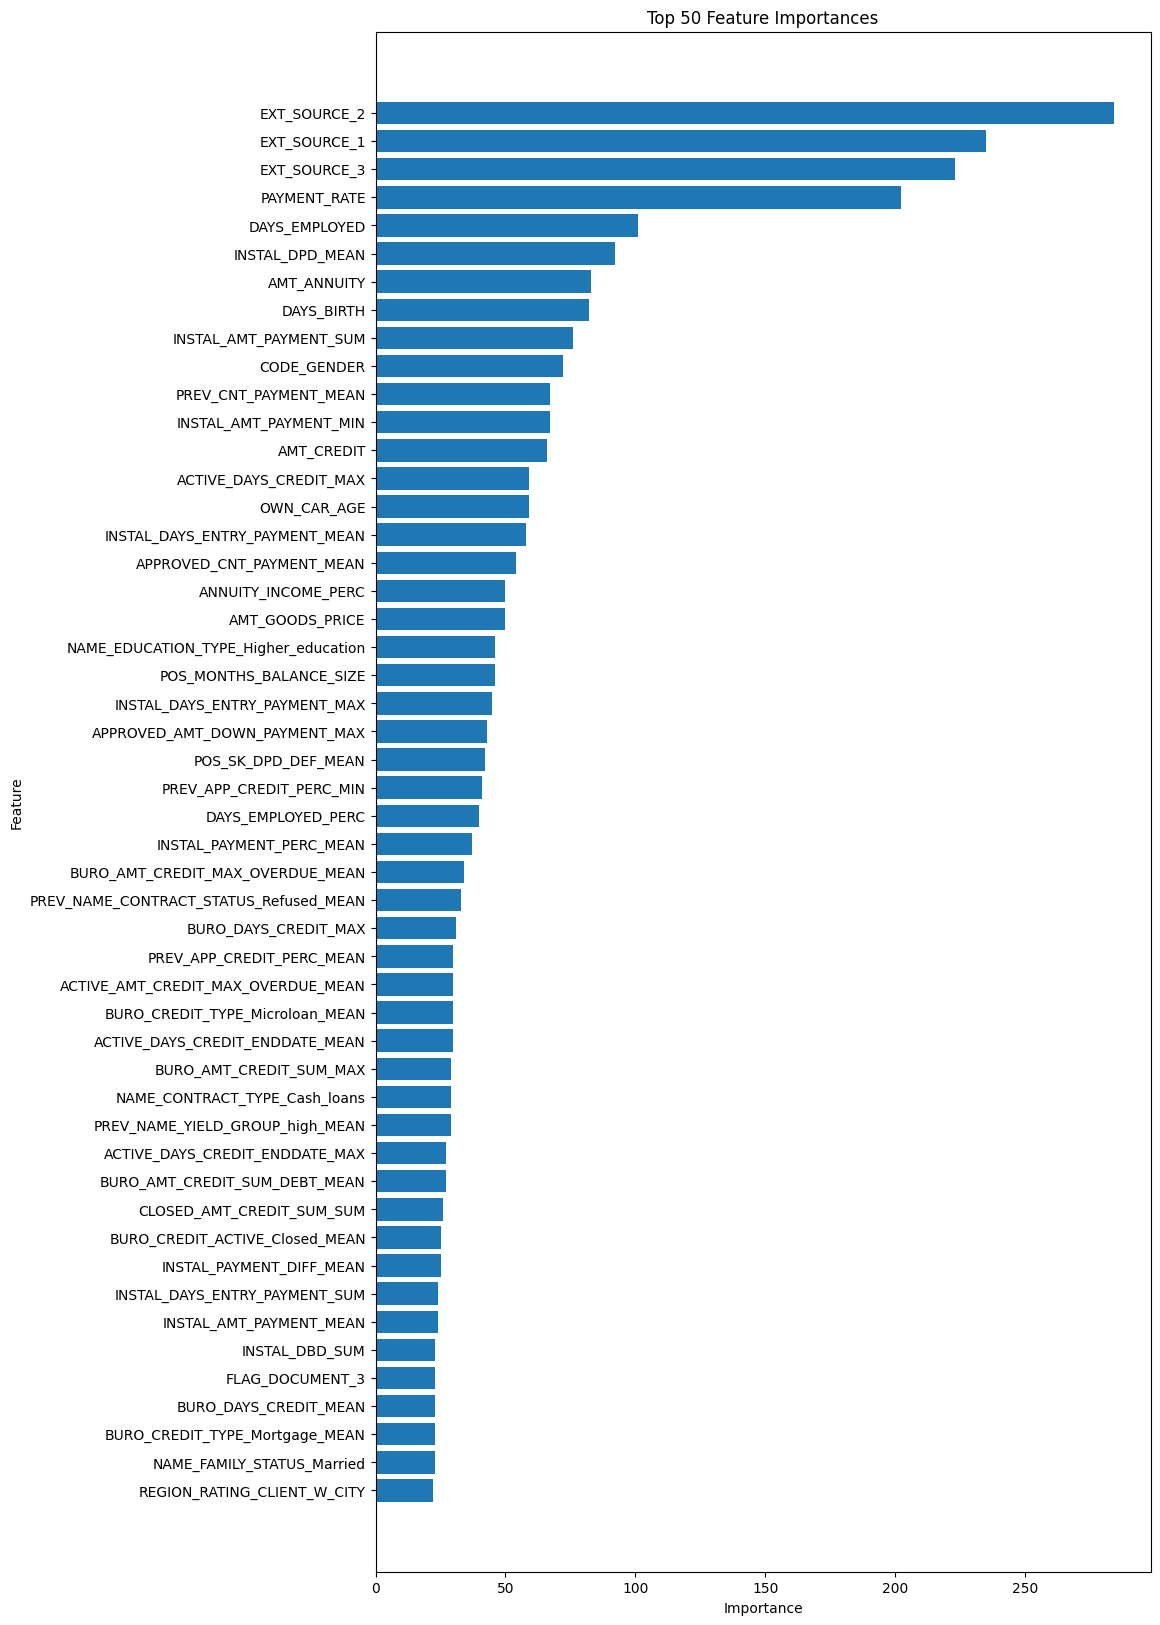

In [ ]:
#uniquement les 50 premières features par importance
top_50_features = importance_df.head(50)

plt.figure(figsize=(10, 20))
plt.barh(top_50_features['Feature'], top_50_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 50 Feature Importances')
#pour que les plus importantes soient en haut
plt.gca().invert_yaxis()
plt.show()

##en utilisant SHAP pour des explications plus fines et locales pour les clients de api (nouveaux clients)

###Calcul de l'importance  des caractéristiques GLOBALE avec SHAP

In [ ]:
import shap
import lightgbm as lgb
import pandas as pd
import joblib

#le modèle LightGBM
model = joblib.load('lightgbm_model_f.joblib')

# Charger les données d'entraînement pour la transformation
X_final = pd.read_csv('X_final_n.csv')

# Créer un explainer SHAP pour LightGBM
explainer = shap.Explainer(model, X_final)

# Calculer les valeurs SHAP pour l'ensemble des données
shap_values = explainer(X_final)

# Visualisation globale de l'importance des caractéristiques
shap.summary_plot(shap_values, X_final)


###le plot : SHAP Waterfall
Le waterfall_plot montre comment les valeurs SHAP de chaque caractéristique contribuent de manière additive à la prédiction pour chaque client individuellement. Il fournit une visualisation très détaillée des contributions.
Visualisation de la waterfall plot pour un client spécifique: pour voir quelles colonnes (caractéristiques) ont influencé la prédiction (+ rouge influence positive, - bleu influence négative)

####l'importance locale du client[0] avec SHAP pour les nouveaux_clients

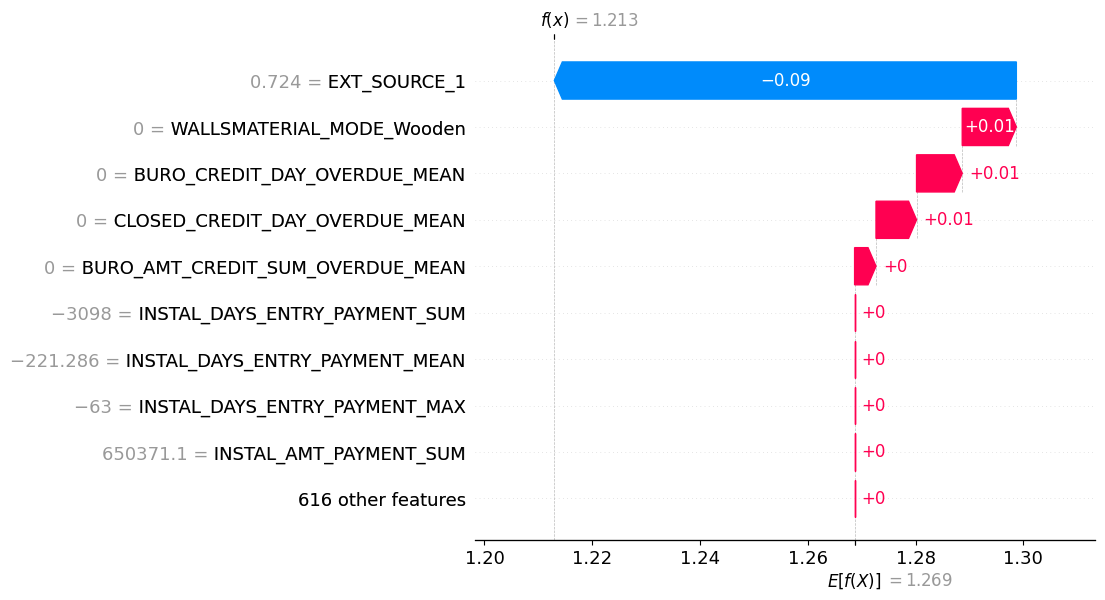

In [ ]:
#la contribution détaillé de chaque caractéristique pour le client 1 : donc le conseiller pourra motivé sa décision en mentionnant
# les caractéristiques qui ont contribués positivement et négativement à la déscicion de refus ou acceptation de donnée le crédit

shap.waterfall_plot(shap_values[0])


In [ ]:
# ou avec cette visualisation verticale
shap.initjs()
shap.force_plot(shap_values[0])

####l'importance locale du client[5] avec SHAP

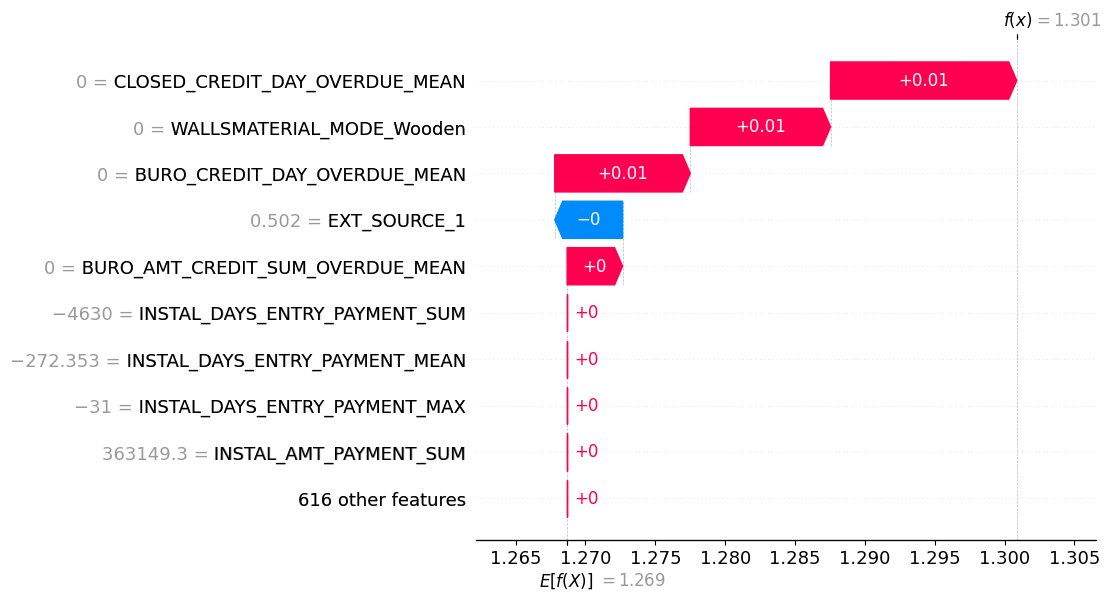

In [ ]:
#la contribution détaillé de chaque caractéristique pour le client 6: : donc le conseiller pourra motivé sa décision en mentionnant
# les caractéristiques qui ont contribués positivement et négativement à la déscicion de refus ou acceptation de donnée le crédit

shap.waterfall_plot(shap_values[5])

In [ ]:
# ou avec cette visualisation verticale
shap.initjs()
shap.force_plot(shap_values[1])
